## **1. Business problem**

## **Objective**


*   The task is to develop a prediction model for predicting whether or not a vehicle faces imminent failure of APS system 




# **2. Data Description**



*   The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The datasets'positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts.






# **3. Problem Formulation**

## **3.1 Machine Learning problem**


*   It is a binary classification problem. For the given numerical data on some attributes of failed scania trucks systems we have to predict whether the failure is caused in the APS system or not.The data we have got is highly imbalanced dataset with a lot of missing values.




## **3.2 Business Constraints**


*   Latency must be fairly low, to detect a failure in the APS and avoid increase in maintenance cost.
*   Cost of misclassification is very high since an APS failure which is not detected can lead to failure of the truck during operation and increase in maintenance cost.









## **3.3 Performance Metric**


*   The cost function for this problem is **Total_cost = (Cost_1 x No_Instances) + (Cost_2 x No_Instances)**. Where Cost_1 refers to the cost that an unnecessary check needs to be done by an mechanic at an workshop. While Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown. Here Cost_1 = 10 and Cost_2 = 500. 
*   Cost_1 can be interpreted as FP and Cost_2 as a FN. To minimize both FP and FN, we use a **F1 score**.



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("/content/drive/My Drive/ida_2016_challenge_update (1)/ida_2016_challenge_update/ida_2016_training_set_update.csv")

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
df.shape

(60000, 171)

# **4. Exploratory Data Analysis**

In [5]:
#replace pos with 1 and neg with 0
df["class"].loc[df["class"]=="neg"]=0
df["class"].loc[df["class"]=="pos"]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
df["class"].value_counts()# Distribution of class labels

0    59000
1     1000
Name: class, dtype: int64

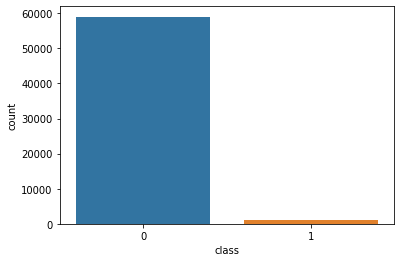

In [ ]:
sns.countplot(x= df["class"])

## **4.1 Missing Values**

We will now check the missing values and its pattern accross the dataframe

In [7]:
df.replace('na',np.nan,inplace = True)# replace all the na values with Nan

In [8]:
missing_columns = df.columns[df.isnull().any()].tolist() #list of all the columns containing missing values.

In [ ]:
df.isnull()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59996,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

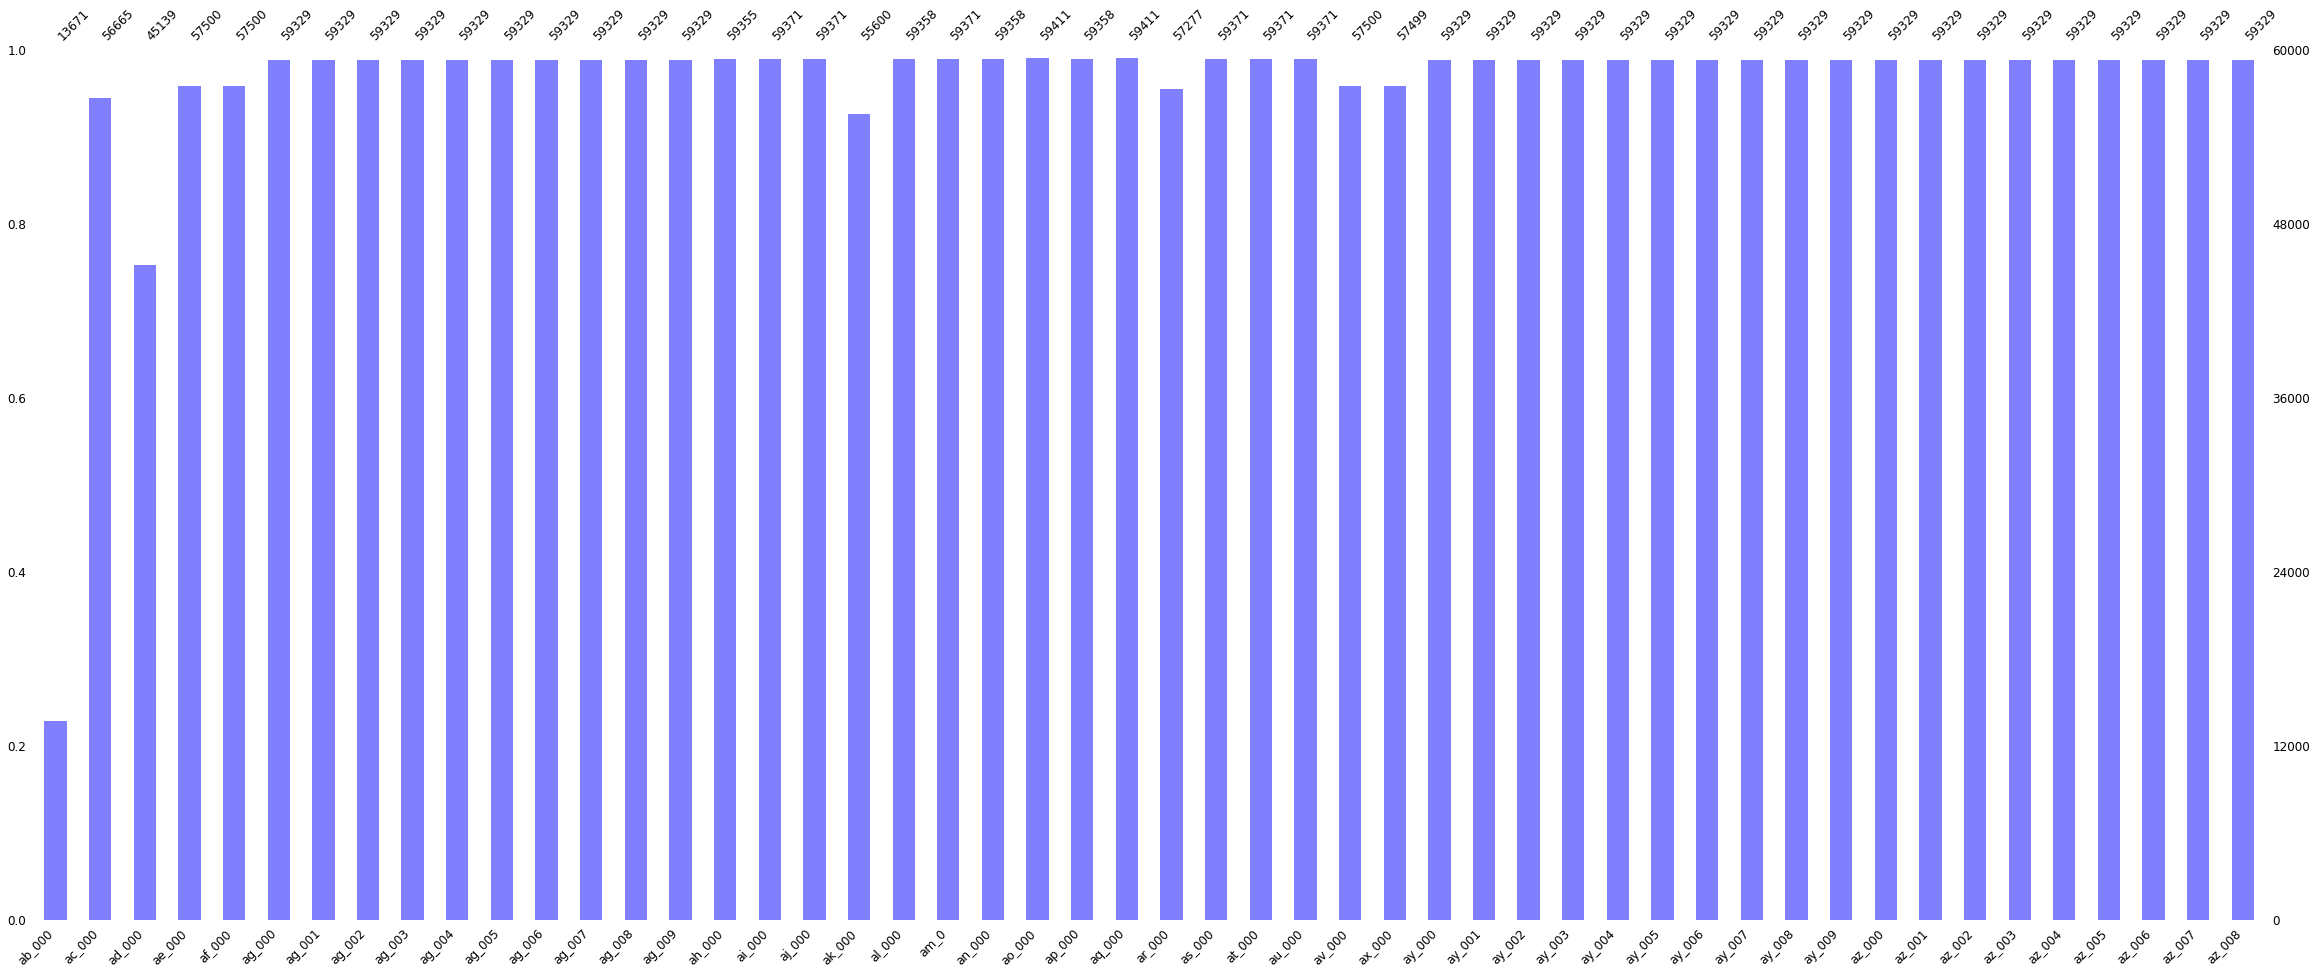

In [ ]:
#the library used here is msno which is used for identifying missingness pattern
#http://akshaysehgal.com/missing_data.html

msno.bar(df[missing_columns[0:50]],\
            figsize=(40,16),color=(0.5, 0.5, 1),fontsize=12,labels=True,)

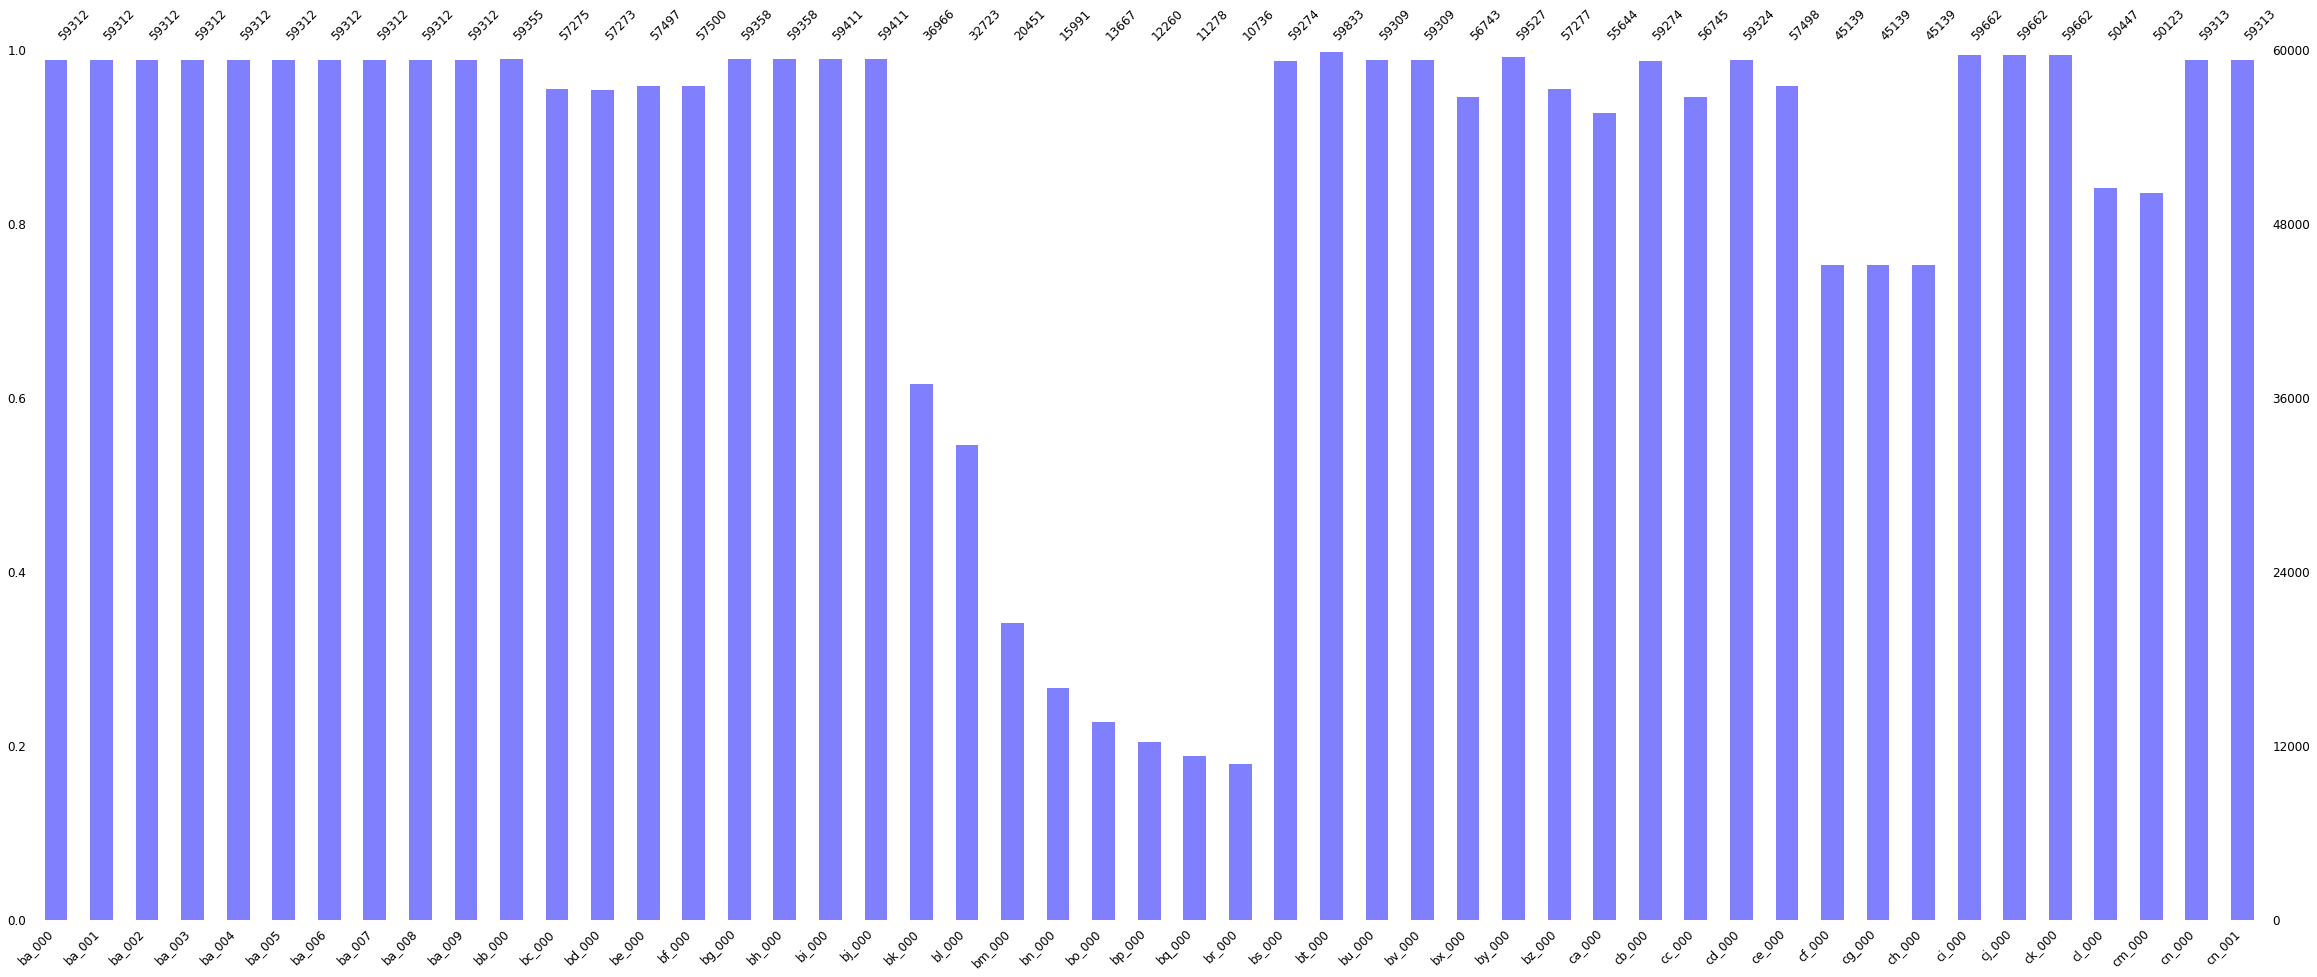

In [ ]:
msno.bar(df[missing_columns[51:100]],\
            figsize=(40,16),color=(0.5, 0.5, 1),fontsize=12,labels=True,)

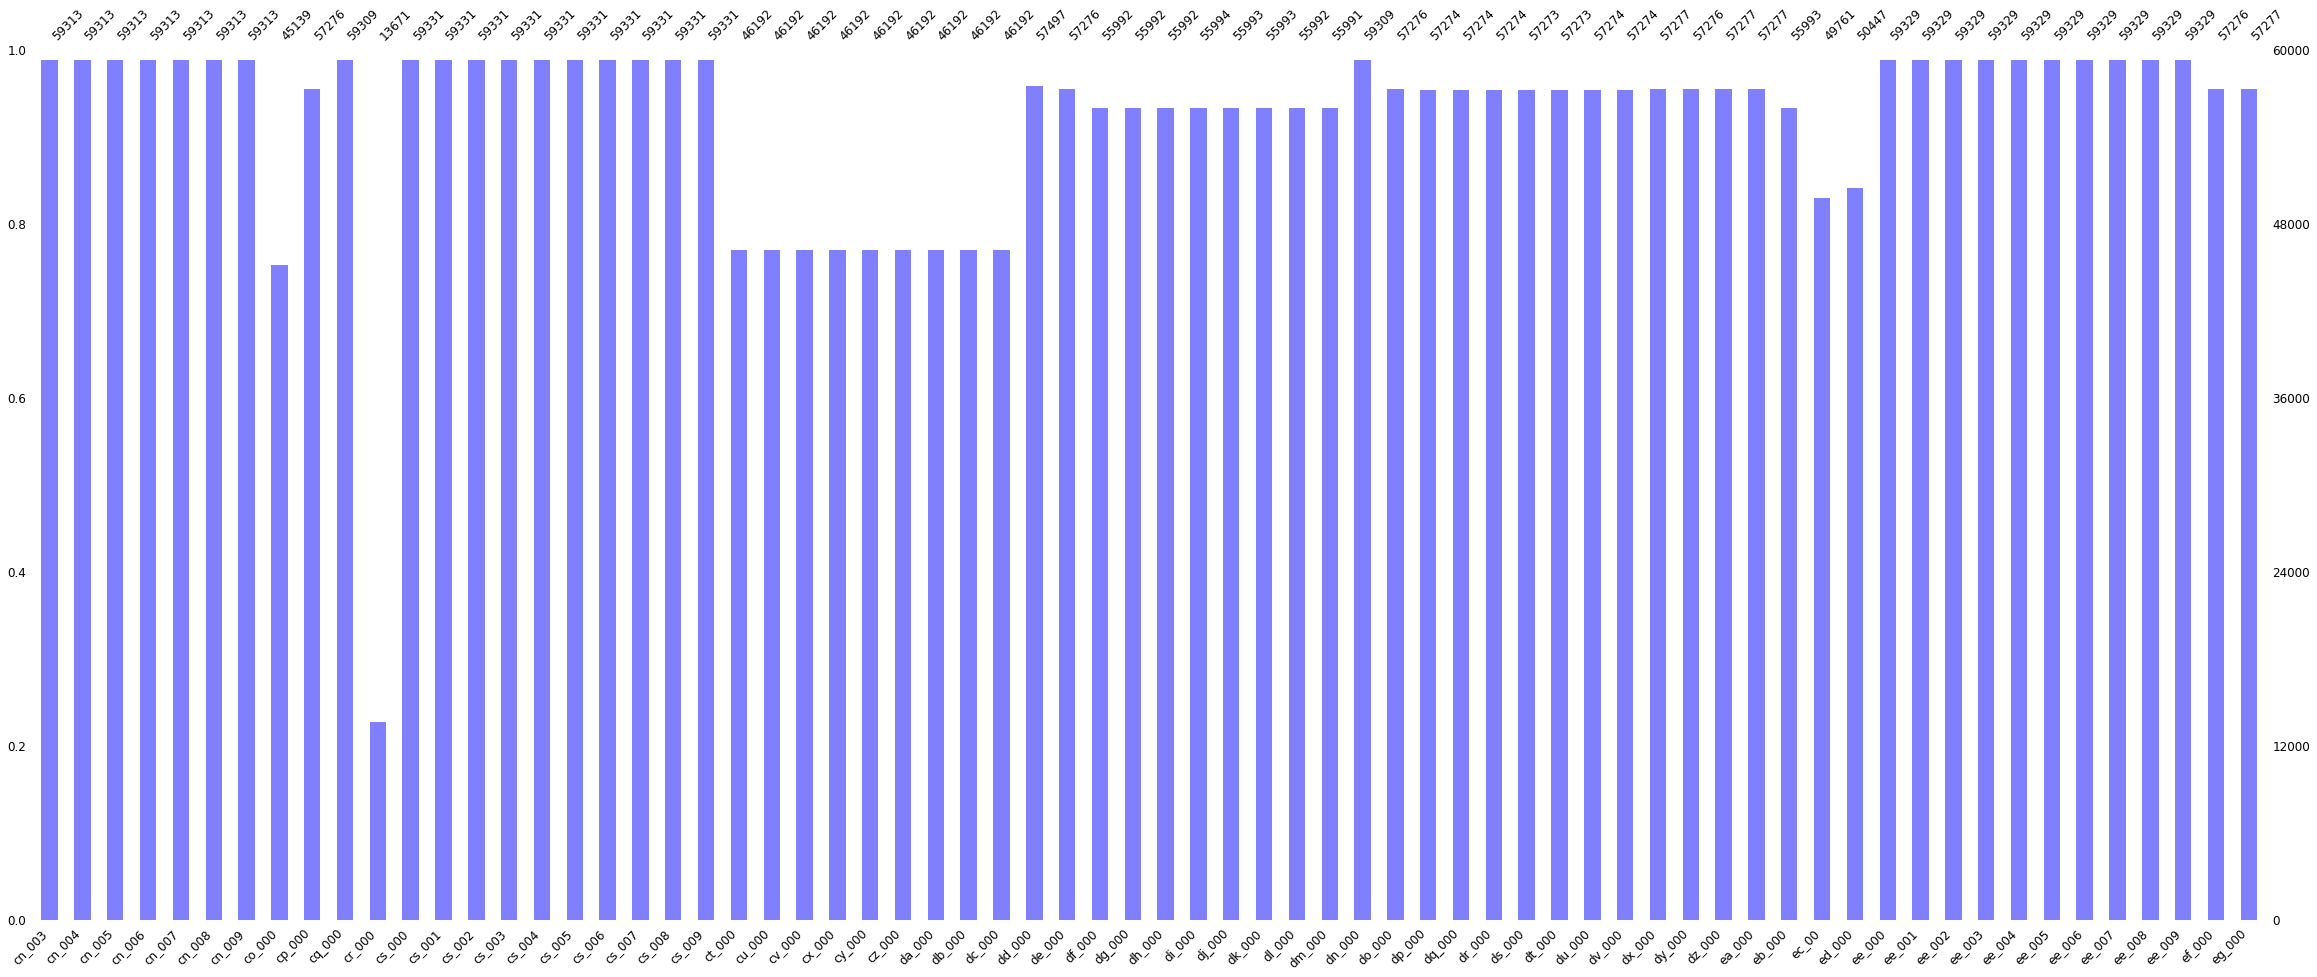

In [ ]:
msno.bar(df[missing_columns[101:171]],\
            figsize=(40,16),color=(0.5, 0.5, 1),fontsize=12,labels=True,)

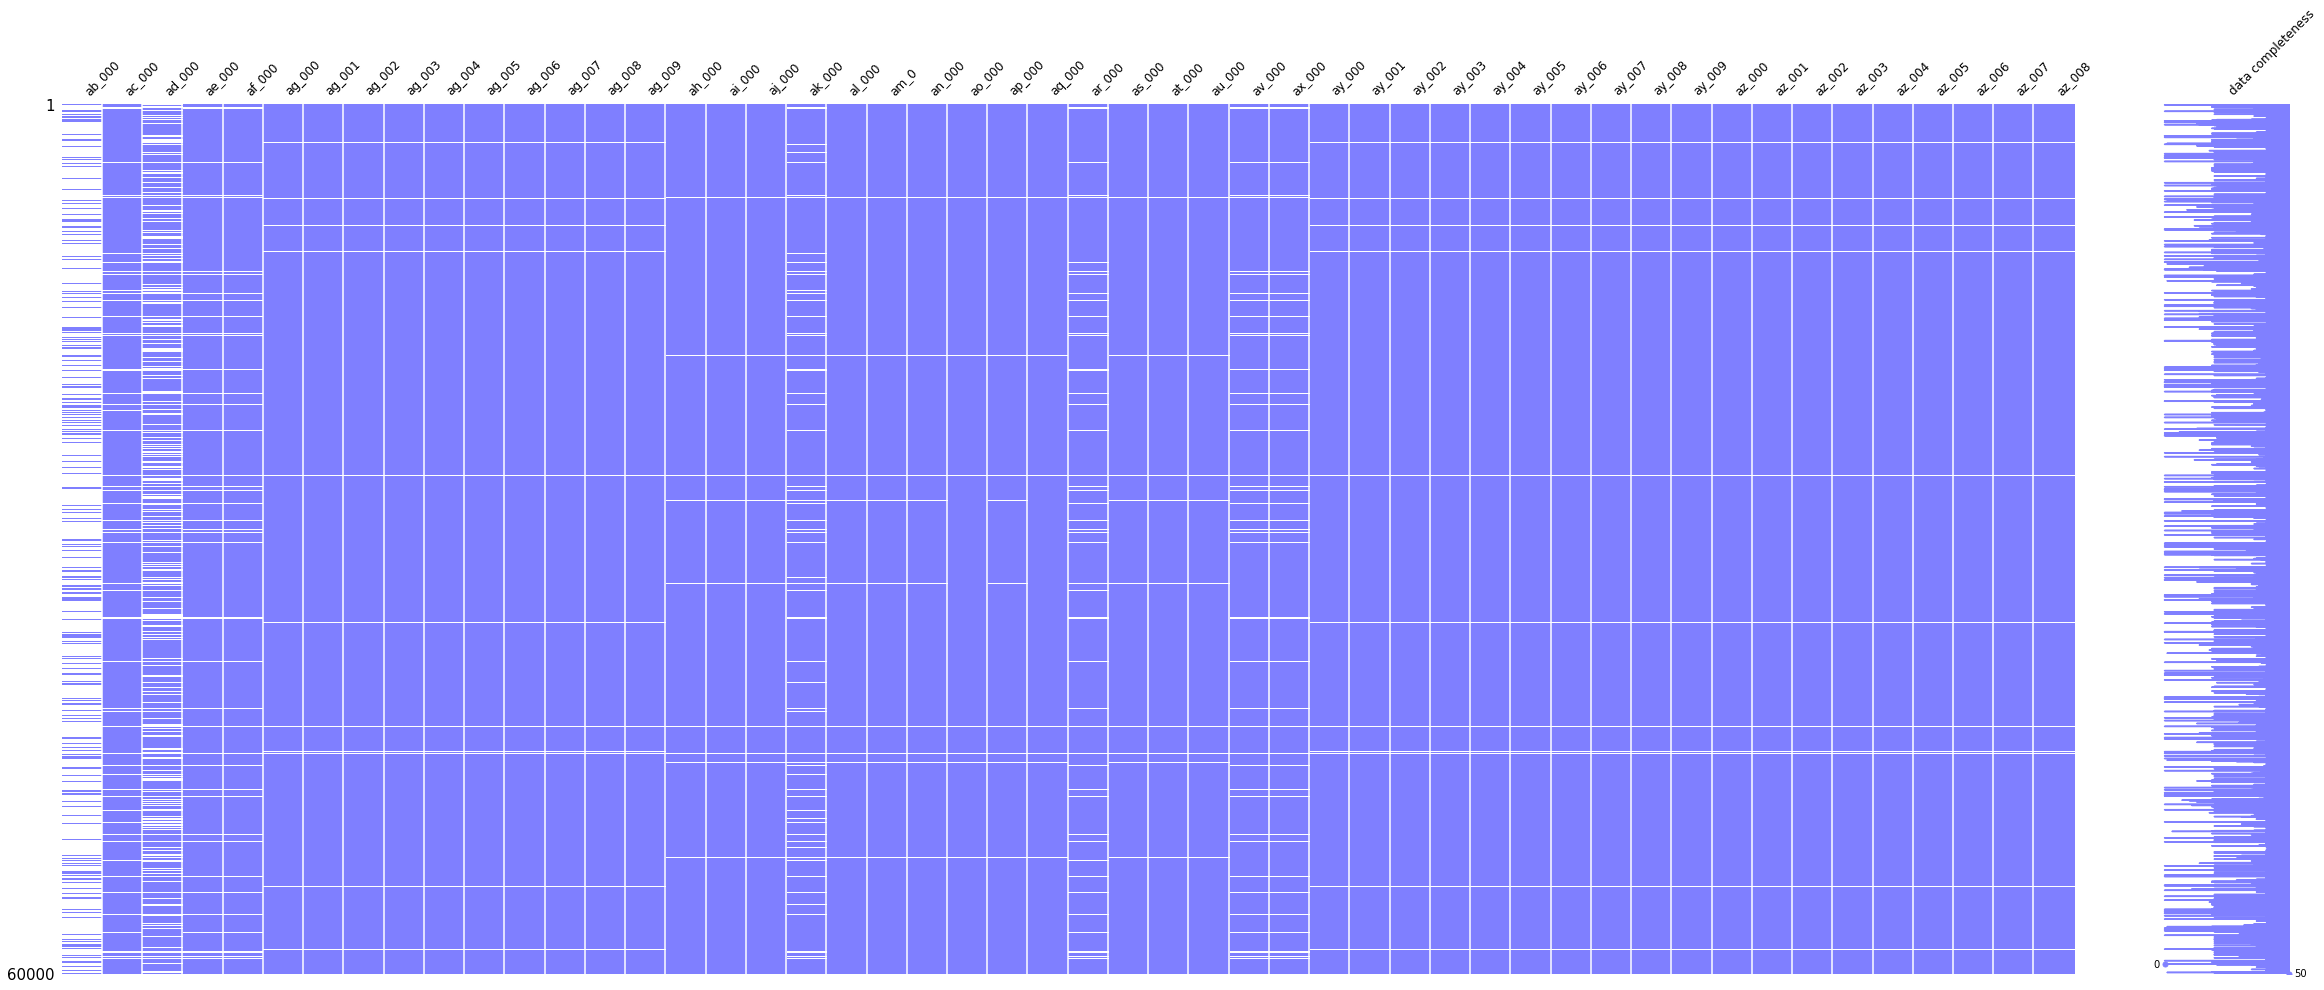

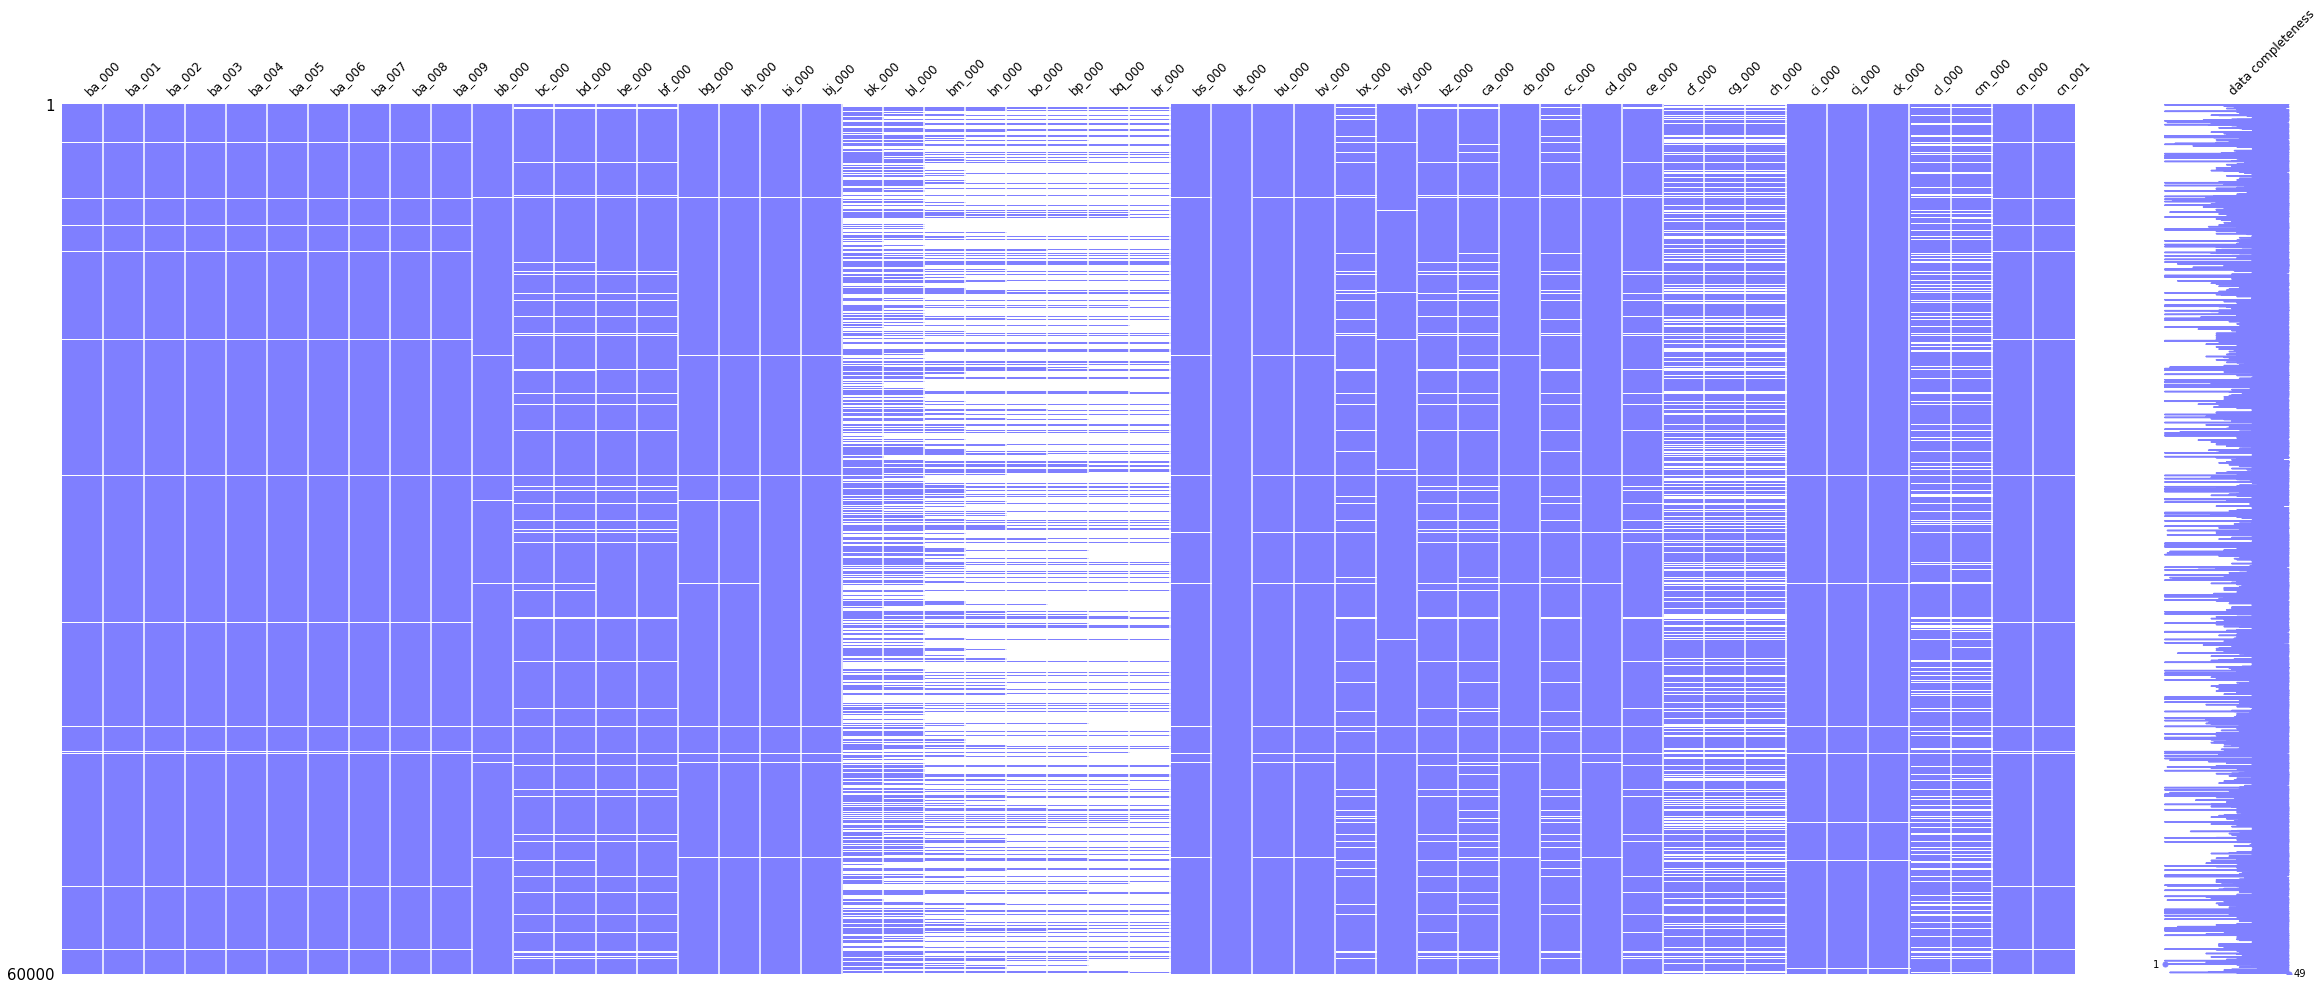

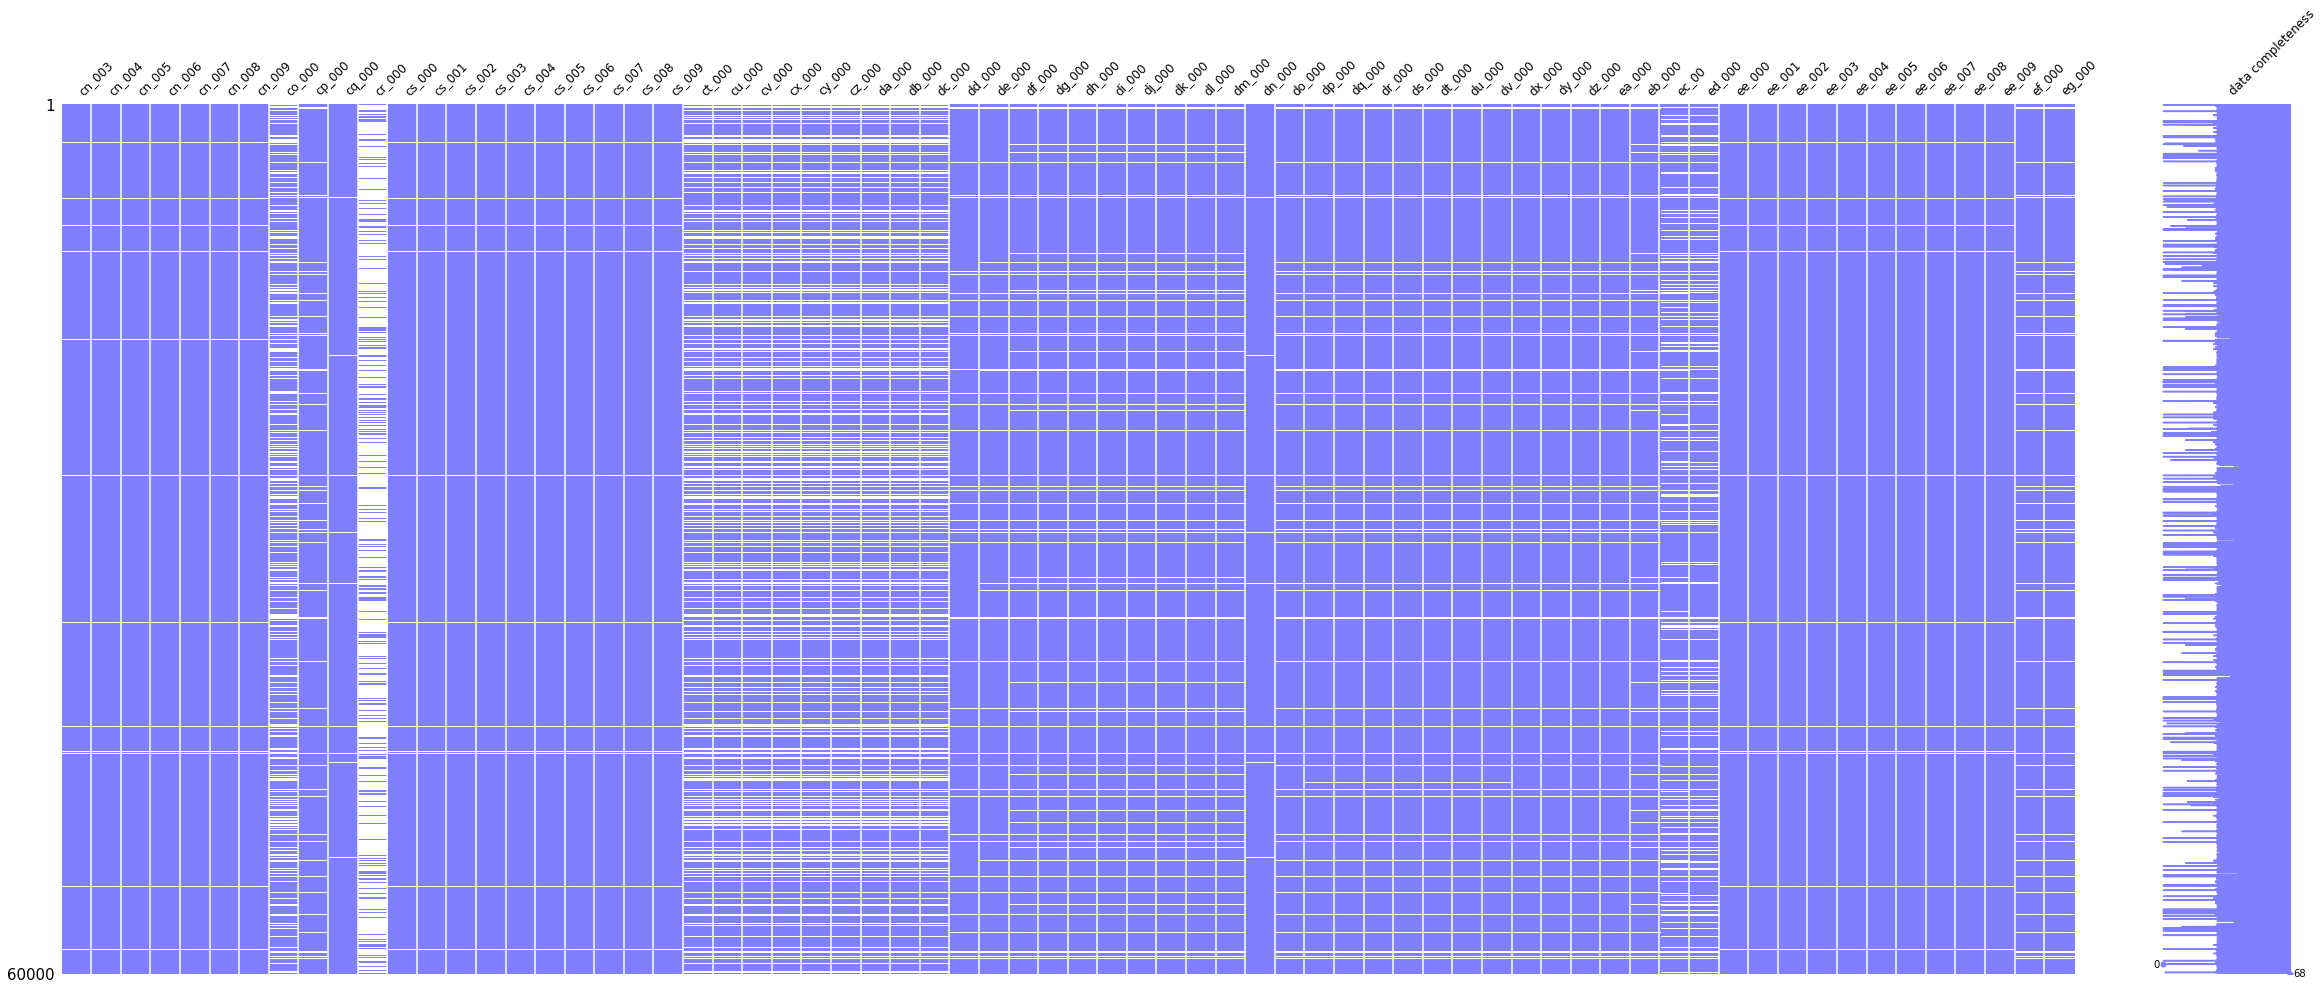

In [ ]:
msno.matrix(df[missing_columns[0:50]],\
            figsize=(40,16),color=(0.5, 0.5, 1),fontsize=12,labels=True,)
msno.matrix(df[missing_columns[51:100]],\
            figsize=(40,16),color=(0.5, 0.5, 1),fontsize=12,labels=True,)
msno.matrix(df[missing_columns[101:171]],\
            figsize=(40,16),color=(0.5, 0.5, 1),fontsize=12,labels=True,)


### **Observation**

* From the above plots we can see conclude that the missingness in the dataset is random.
* We will now sort the features according to the percentage of its missing values.

Text(0, 0.5, 'Percantage of missingness')

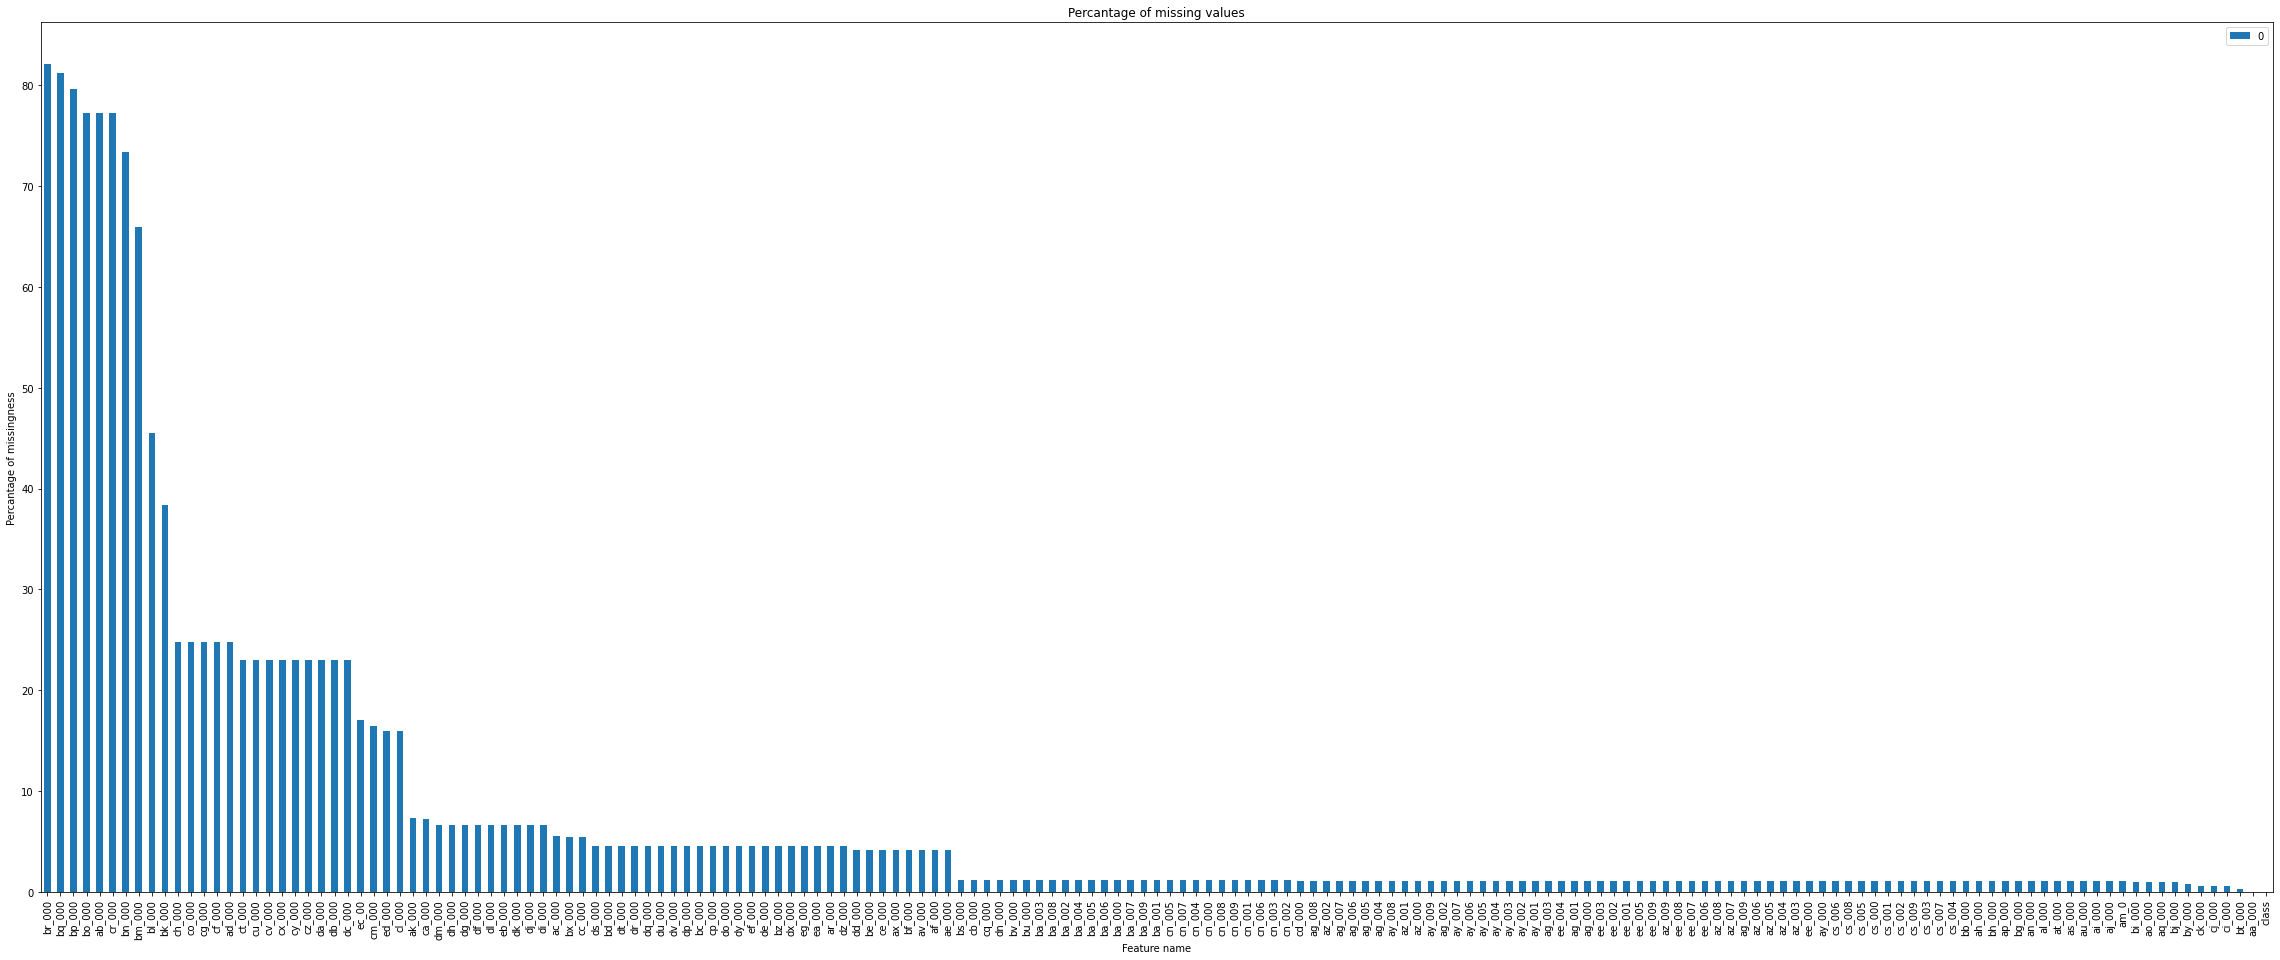

In [9]:
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
ax= missing.plot.bar(figsize=(40,16))
ax.set_xlabel('Feature name')
ax.set_title('Percantage of missing values')
ax.set_ylabel('Percantage of missingness')


## **4.2 Missing Values and Imputaton**



*   Remove features having missing values> 60%

*   We then try and impute the missing values in the remaining features.

*   We use a technique called SoftImputation. It is a package for matrix completion using nuclear norm regularization. It iteratively computes the soft-thresholded SVD of a filled in matrix.










In [10]:
columns_60 = missing[missing[0]>60]
cols_name = columns_60.index
df = df.drop(cols_name,axis=1)

In [11]:
columns_data= df.columns

In [12]:
from fancyimpute import  SoftImpute
x_softimpute = SoftImpute().fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


[SoftImpute] Max Singular Value of X_init = 207329831193.025360
[SoftImpute] Iter 1: observed MAE=388386.432239 rank=5
[SoftImpute] Iter 2: observed MAE=385005.810720 rank=5
[SoftImpute] Iter 3: observed MAE=384580.195370 rank=5
[SoftImpute] Iter 4: observed MAE=384798.017294 rank=5
[SoftImpute] Iter 5: observed MAE=385137.480217 rank=5
[SoftImpute] Iter 6: observed MAE=385447.758303 rank=5
[SoftImpute] Iter 7: observed MAE=385700.151552 rank=5
[SoftImpute] Iter 8: observed MAE=385896.340441 rank=5
[SoftImpute] Iter 9: observed MAE=386045.071885 rank=5
[SoftImpute] Iter 10: observed MAE=386156.988609 rank=5
[SoftImpute] Iter 11: observed MAE=386241.180940 rank=5
[SoftImpute] Iter 12: observed MAE=386304.944509 rank=5
[SoftImpute] Iter 13: observed MAE=386353.551439 rank=5
[SoftImpute] Iter 14: observed MAE=386390.912686 rank=5
[SoftImpute] Iter 15: observed MAE=386419.988716 rank=5
[SoftImpute] Iter 16: observed MAE=386442.846637 rank=5
[SoftImpute] Iter 17: observed MAE=386461.025698 

In [13]:
columns_data= df.columns
df_new = pd.DataFrame(x_softimpute, columns= columns_data)     #preparing new dataframe with imputations and undropped attributes


In [14]:
df_new.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,18.000000,5.330690e+06,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.000000e+00,884.255624,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,1.028019,4.940259e+05,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,0.000000,2.341048e+06,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,0.000000,2.578000e+03,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,...,0.000000,3.590004e+06,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


## **4.3 Feature Selection**

*   There are around 163 features in the dataset. All the features are not important for modelling, hence we try and compute the top 20 features based on feature importance
*   We apply technique called RFE(Recursive Feature elimination)




In [ ]:
# Split the dataset
y= df_new["class"]
x= df_new.drop('class',axis=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1),
                         n_features_to_select=20,
                         verbose=5)
rfe.fit(x,y)

for i in range(x.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))



Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
F

In [ ]:
feature_imp = dict(zip(x.columns,rfe.support_))

In [ ]:
feature_new = []
for k,v in feature_imp.items():
  if v== True:
    feature_new.append(k)


In [16]:
data = df_new[feature_new]
data["class"] = df_new["class"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
data.head()

,aa_000,ag_001,ag_002,ag_003,al_000,am_0,aq_000,ay_005,ay_006,al_000,bj_000,bt_000,bu_000,ci_000,ck_000,cn_000,cn_001,dn_000,ee_005,ee_007,class
0,76698.0,0.0,0.0,0.0,0.0,0.0,1132040.0,469014.0,4239660.0,0.0,799478.0,76698.08,6700214.0,5245752.00,916567.68,0.0,0.0,62282.0,469792.0,157956.0,0.0
1,33058.0,0.0,0.0,0.0,0.0,0.0,338544.0,71510.0,772720.0,0.0,392208.0,33057.51,3646660.0,2291079.36,643536.96,0.0,0.0,33736.0,245416.0,81140.0,0.0
2,41040.0,0.0,0.0,0.0,0.0,0.0,153698.0,0.0,870456.0,0.0,139730.0,41040.08,2673338.0,2322692.16,236099.52,0.0,0.0,13876.0,409564.0,158022.0,0.0
3,12.0,0.0,0.0,318.0,642.0,3894.0,1014.0,0.0,0.0,642.0,3090.0,12.69,21614.0,2135.04,4525.44,0.0,52.0,232.0,44.0,0.0,0.0
4,60874.0,0.0,0.0,0.0,0.0,0.0,551022.0,372236.0,2128914.0,0.0,399410.0,60874.03,4289260.0,3565684.80,379111.68,0.0,0.0,44946.0,347188.0,311560.0,0.0


## **4.4 Correlation matrix**



*   We now plot a correlation matrix and find out highly correlated features with respect to class (target variable)
* Upon observation there are no highly correlated feature with respect to class variable



<function matplotlib.pyplot.show>

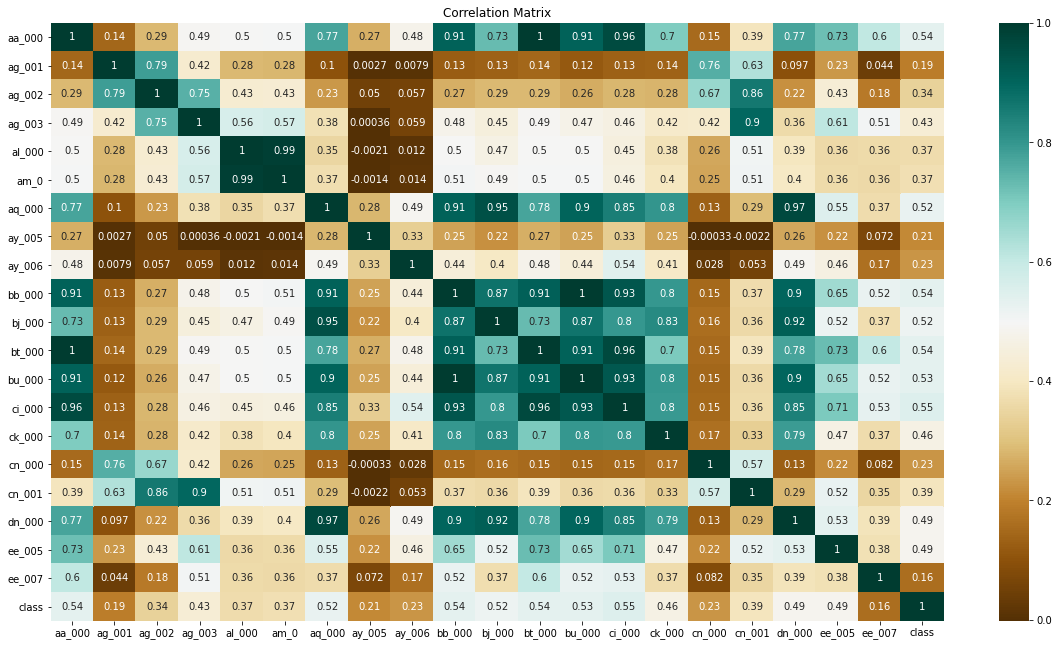

In [ ]:
# Plot Correlation Heatmap      
plt.figure(figsize=(20,11))
sns.heatmap(data.corr(),annot=True,cmap='BrBG')
plt.title("Correlation Matrix")

plt.show

# **5. Univariate Analysis on Features**

**We plot PDF,CDF,Violinplot and Boxplots for all the features. And for Bivariate analysis we plot scatterplots of the features with respect to class.**

In [ ]:
col_list = data.columns
# Function to plot all the graphs related to univariate analysis
def unianalysis(feature_name):
  if feature_name != 'class':
            
            fig,ax = plt.subplots(1,5,figsize=(25,7))
            sns.scatterplot(data.index,data[feature_name],hue=data["class"],ax=ax[0])
            sns.violinplot(data[feature_name],orient = "vertical",ax=ax[1])                                 
            # Plot PDF
            
            sns.distplot(data[data['class']==0][feature_name],ax=ax[2],hist=False)            
            sns.distplot(data[data['class']==1][feature_name],ax=ax[2],hist=False)
            # Plot CDF
             
            sns.kdeplot(data=data, x=data[feature_name], hue=data["class"],ax=ax[3])
            # Plot the Box-Plot
            
            sns.boxplot(x=data['class'],y=data[feature_name],ax=ax[4])
            plt.show()
            

### **ag_000**





*   Higher value of the feature indicates failure.
*   Most of the feature values indicate no failure.





/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

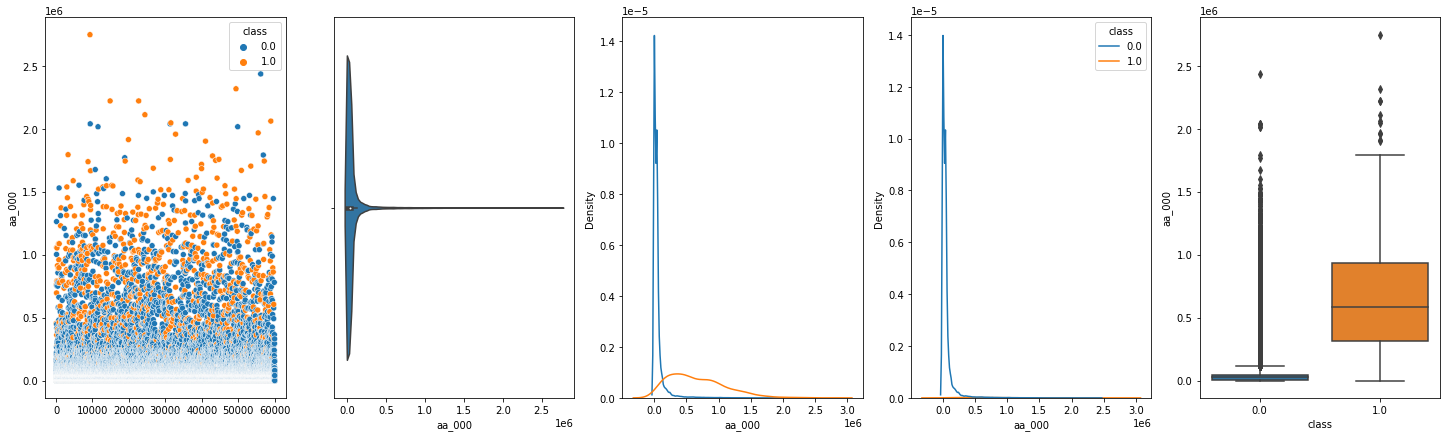

In [ ]:
unianalysis(col_list[0])

## **ag_001**


*   Higher value of the feature indicates failure.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

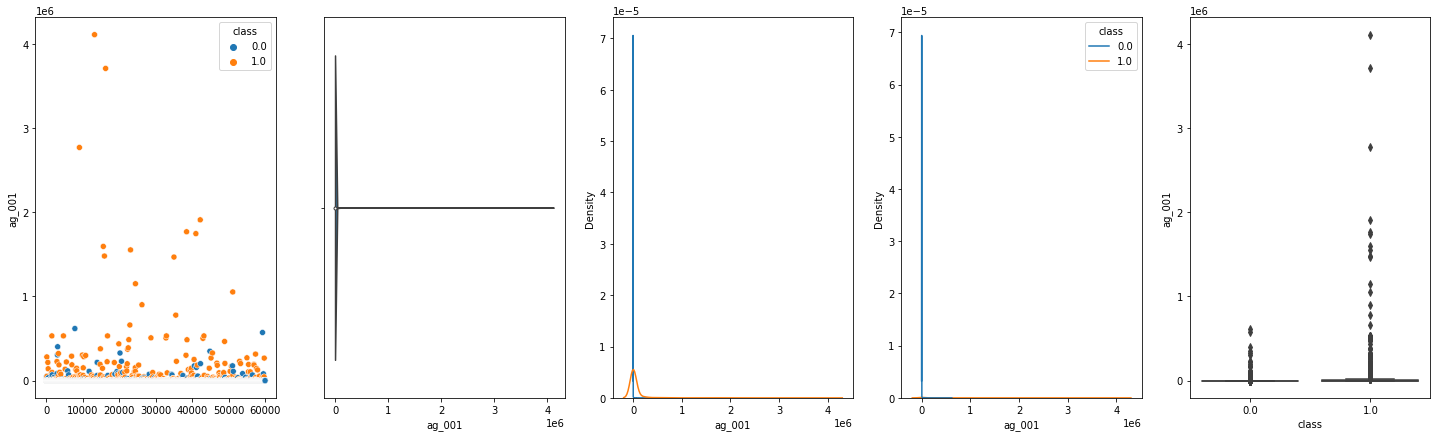

In [ ]:
unianalysis(col_list[1])

## **ag_002**


*   Higher value of the feature indicates failure.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

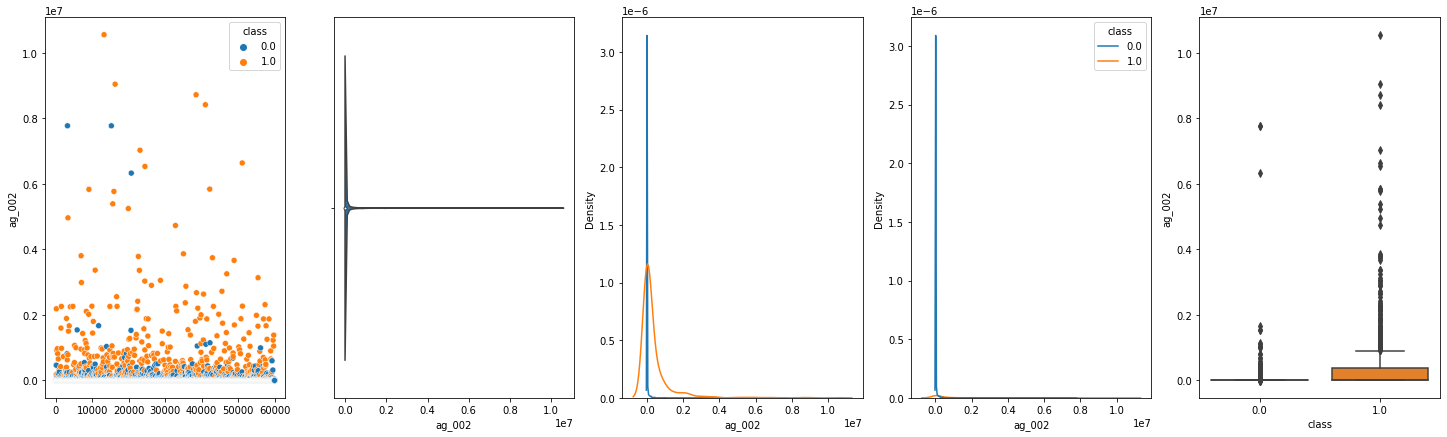

In [ ]:
unianalysis(col_list[2])

## **ag_003**


*   Majority of the values are zero so we might have to remove this feature.
 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

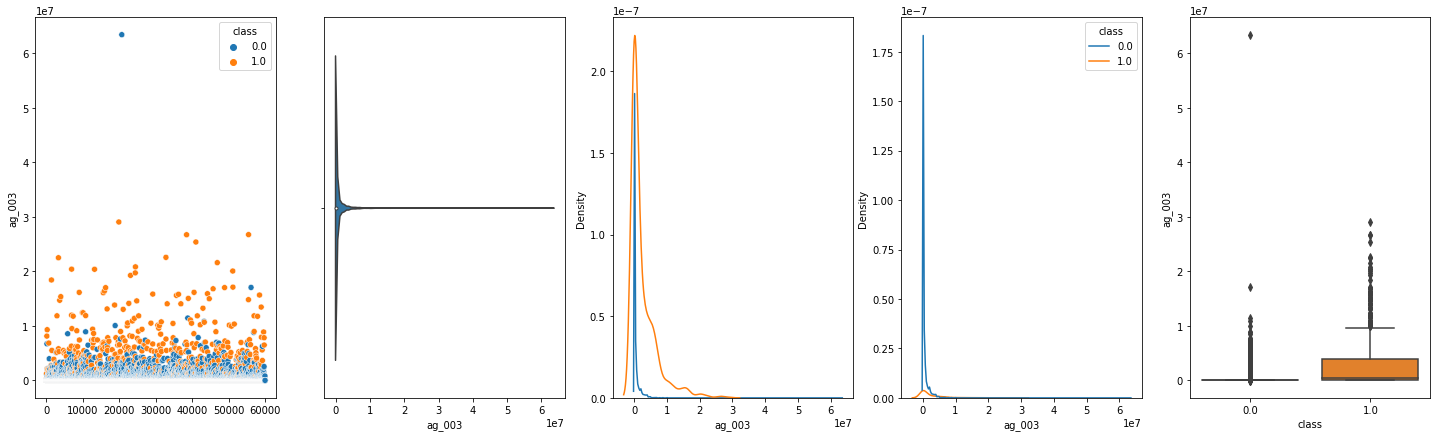

In [ ]:
unianalysis(col_list[3])

## **al_000**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

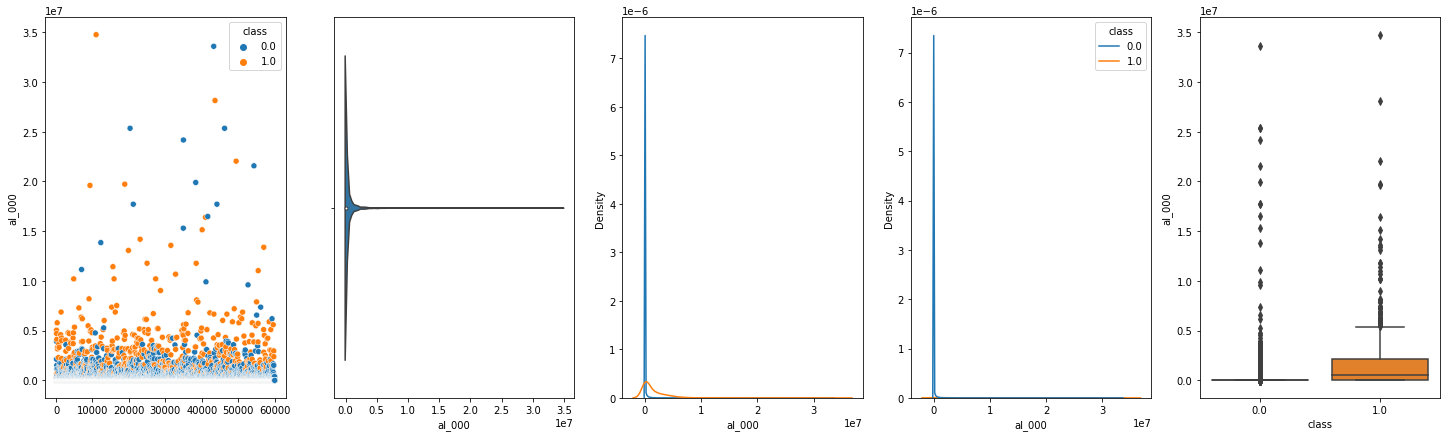

In [ ]:
unianalysis(col_list[4])

## **am_0**


*   Higher value of the feature indicates failure.
*   Most of the feature values indicate no failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

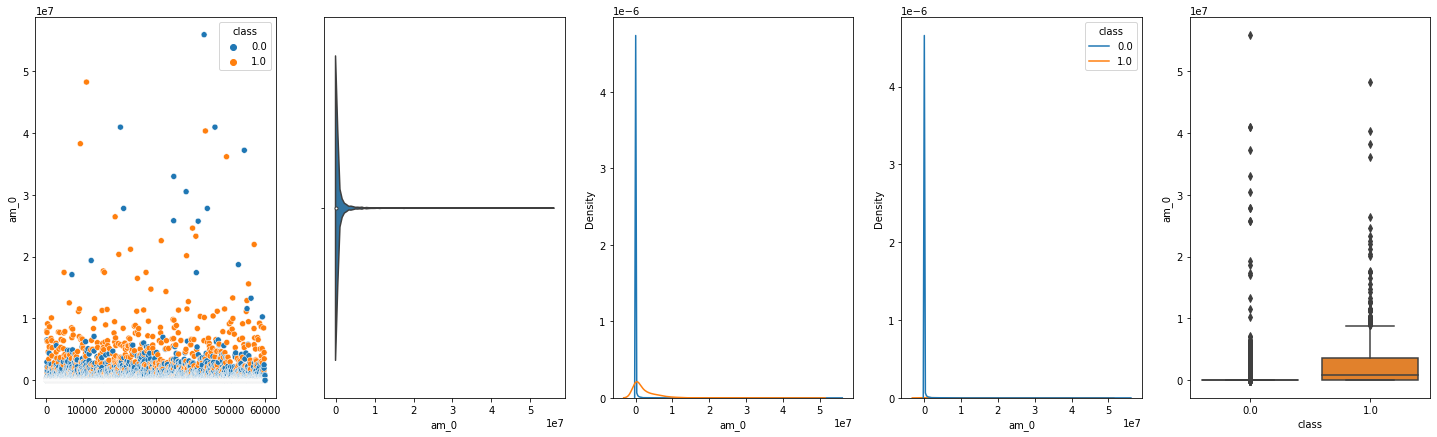

In [ ]:
unianalysis(col_list[5])

## **aq_000**


*   There are a lot of values which indicates no failure of the APS component. 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

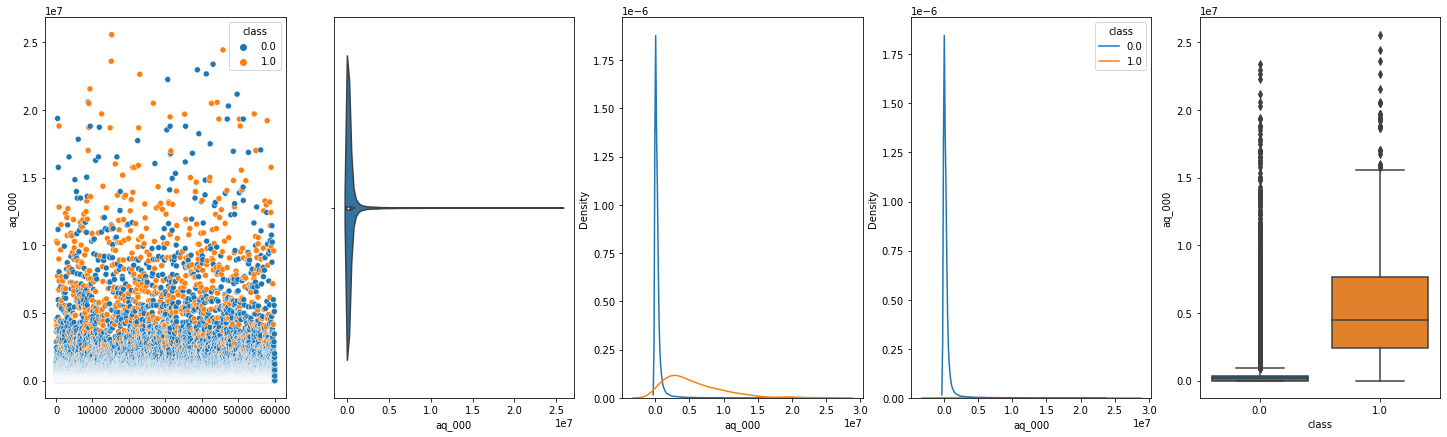

In [ ]:
unianalysis(col_list[6])

## **ay_005**


*   Most of the values indicating no failure are close to zero
*   In this feature, higher values consists of both the classes


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

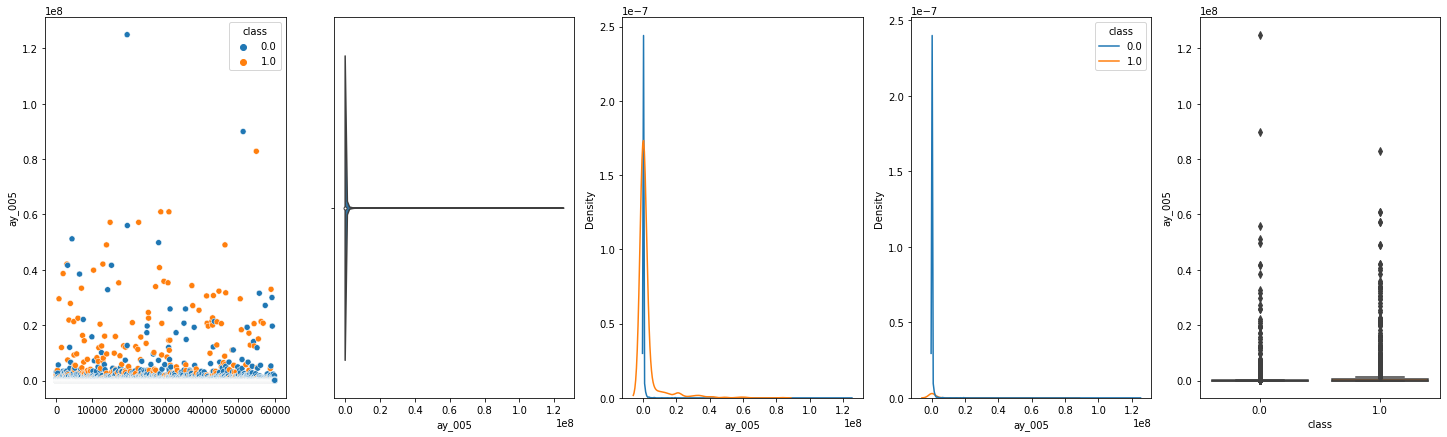

In [ ]:
unianalysis(col_list[7])

## **ay_006**


*   In this feature, higher values consists of both the classes

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

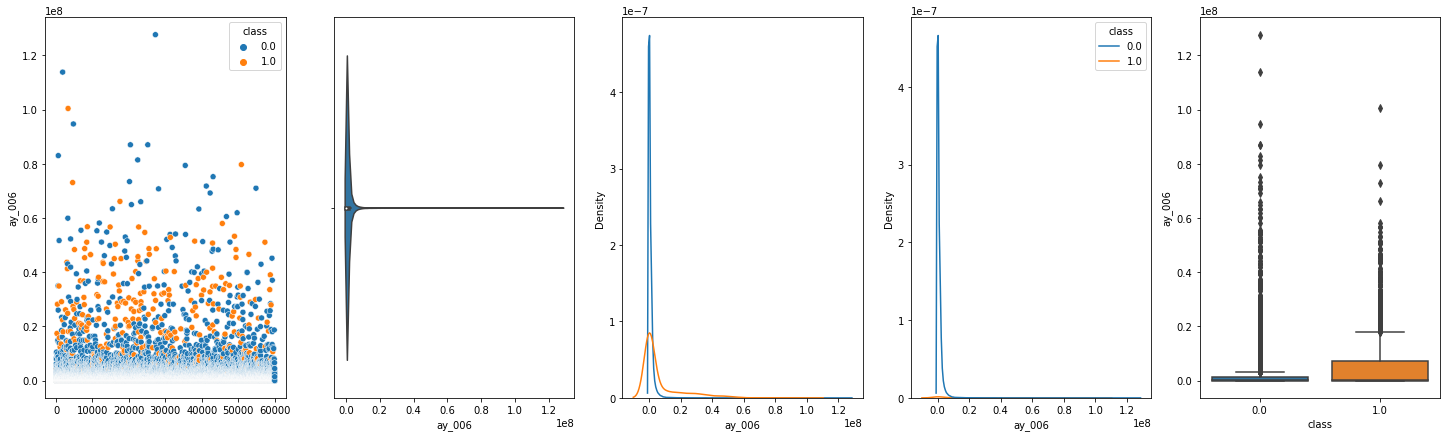

In [ ]:
unianalysis(col_list[8])

## **al_000**


*   Higher value of the feature indicates failure.
*   Most of the feature values indicate no failure.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

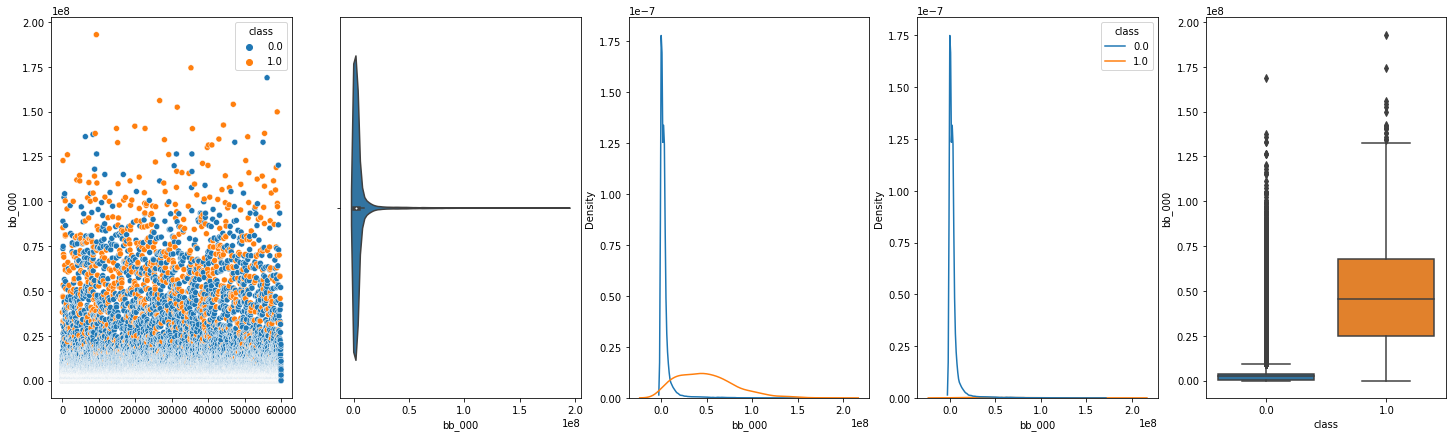

In [ ]:
unianalysis(col_list[9])

## **bj_000**


*   Higher value of the feature indicates failure.
*   Most of the feature values indicate no failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

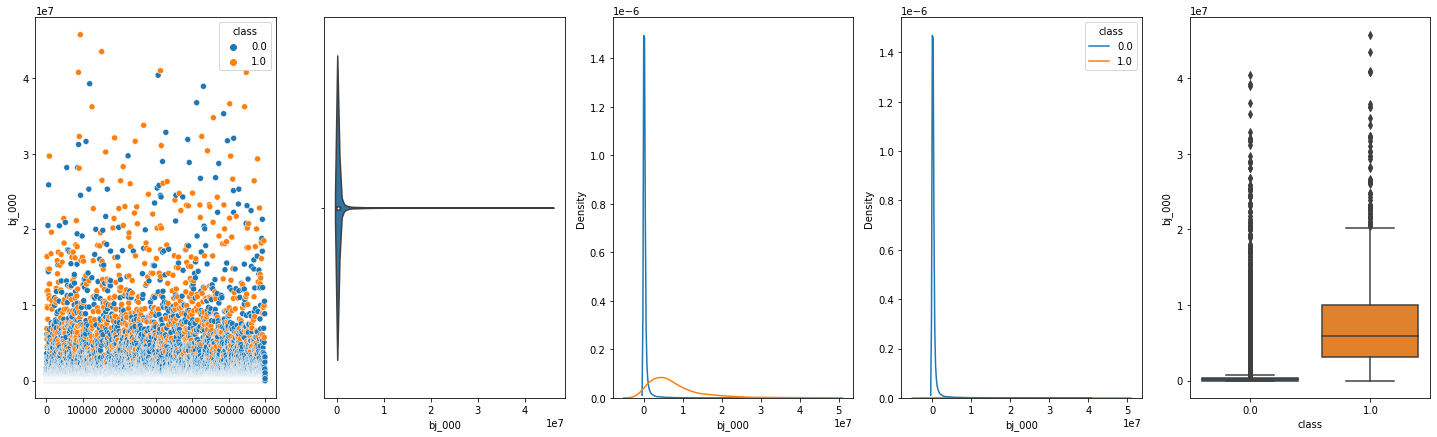

In [ ]:
unianalysis(col_list[10])

## **bt_000**


*   Higher value of the feature indicates failure.
*   Most of the feature values indicate no failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

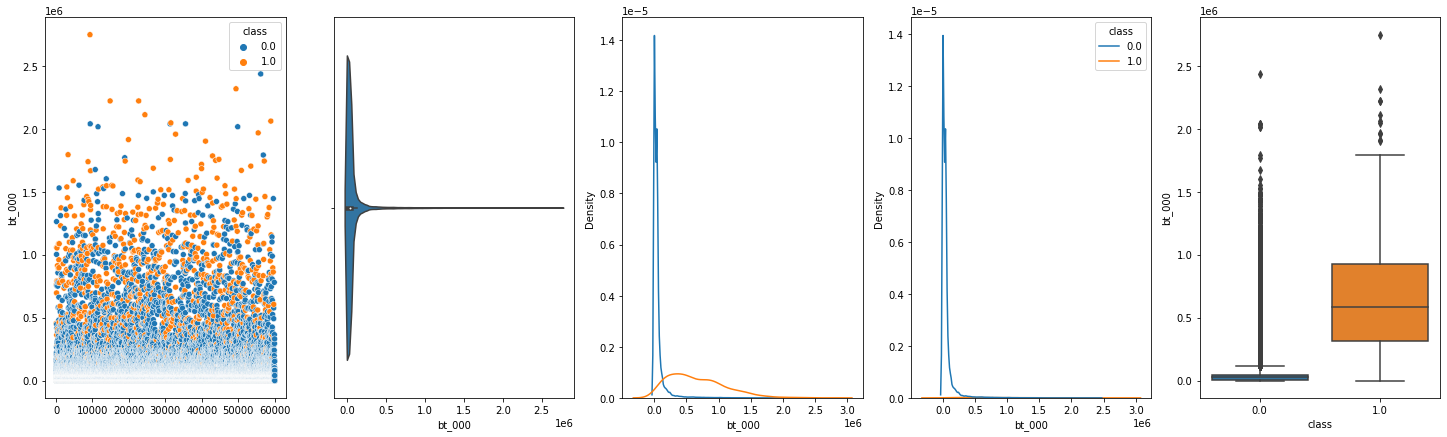

In [ ]:
unianalysis(col_list[11])

## **bu_000**


*   Higher value of the feature indicates failure.
*   Most of the feature values indicate no failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

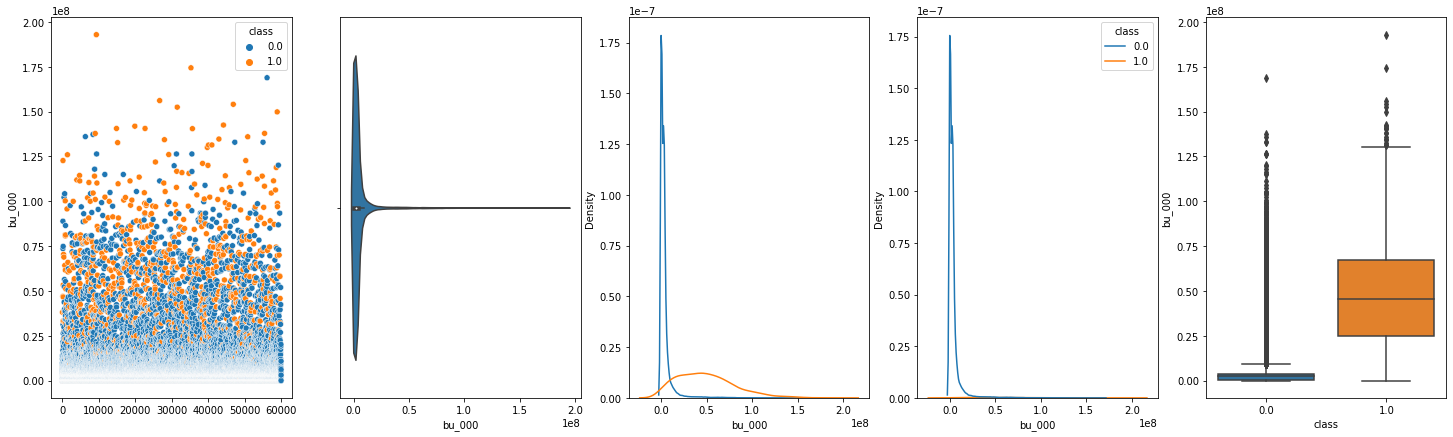

In [ ]:
unianalysis(col_list[12])

## **ci_000**


*   Higher value of the feature indicates failure.
*   Most of the feature values indicate no failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

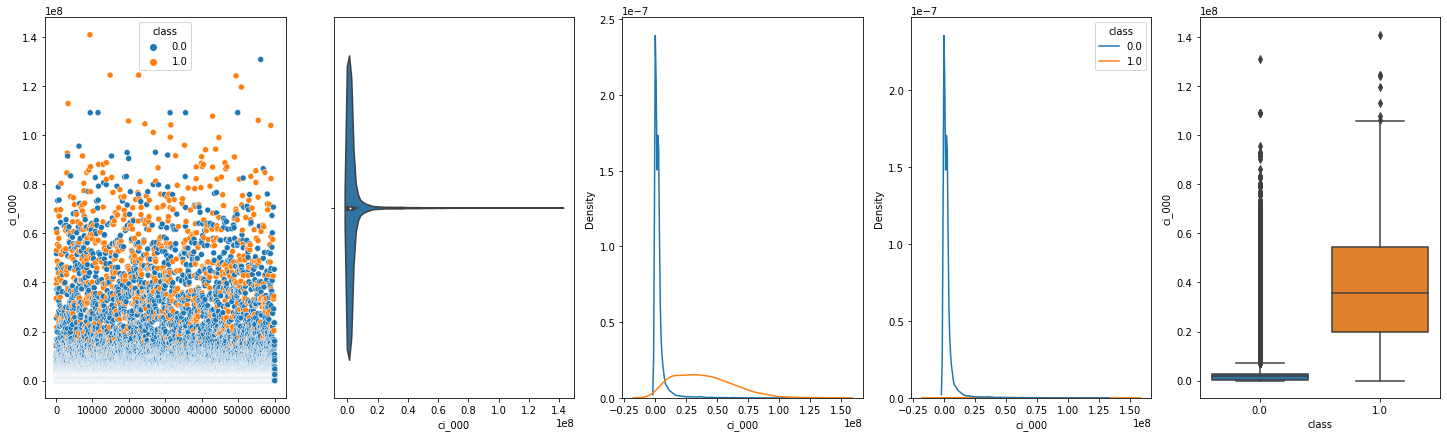

In [ ]:
unianalysis(col_list[13])

## **ck_000**


*   Higher value of the feature indicates failure.
*   Most of the feature values indicate no failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

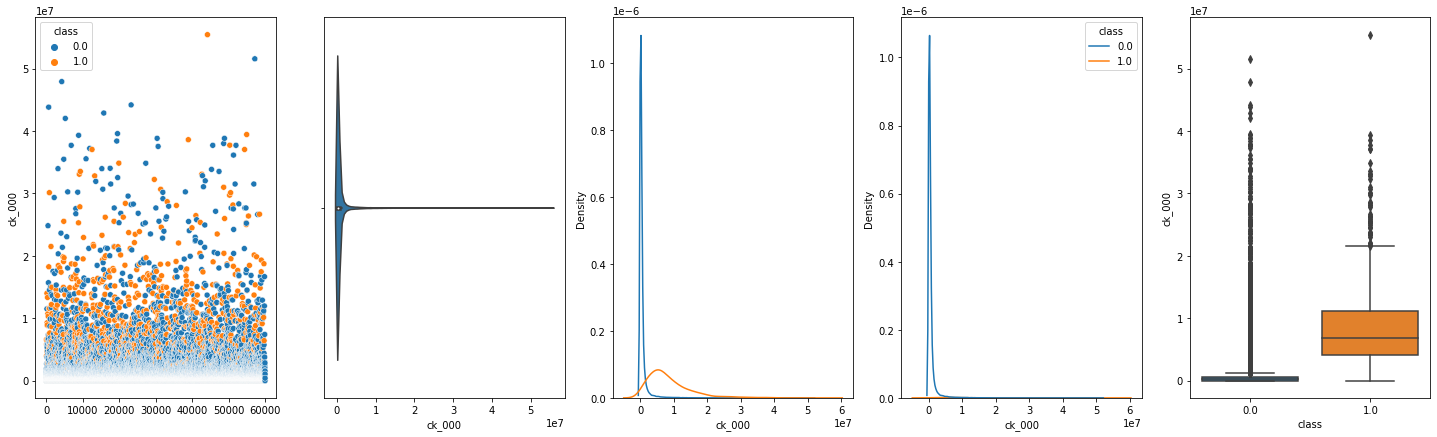

In [ ]:
unianalysis(col_list[14])

## **cn_000**


*   Most of the feature values indicate failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

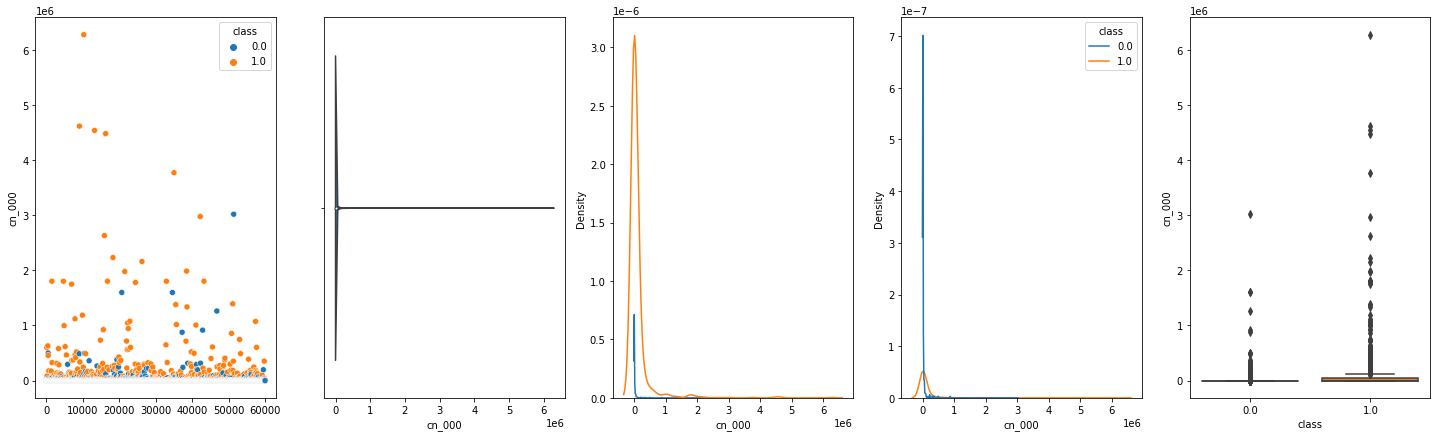

In [ ]:
unianalysis(col_list[15])

## **cn_001**


*   Higher value of the feature indicates failure.
*   Most of the feature values indicate no failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

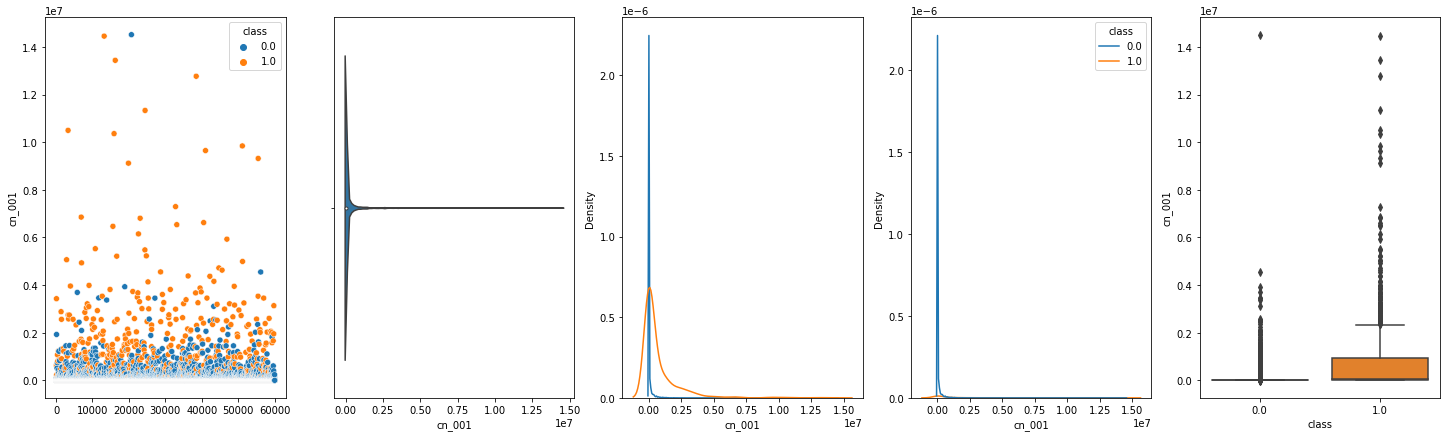

In [ ]:
unianalysis(col_list[16])

## **dn_000**


*   Number of values with power failure is quite lagre.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

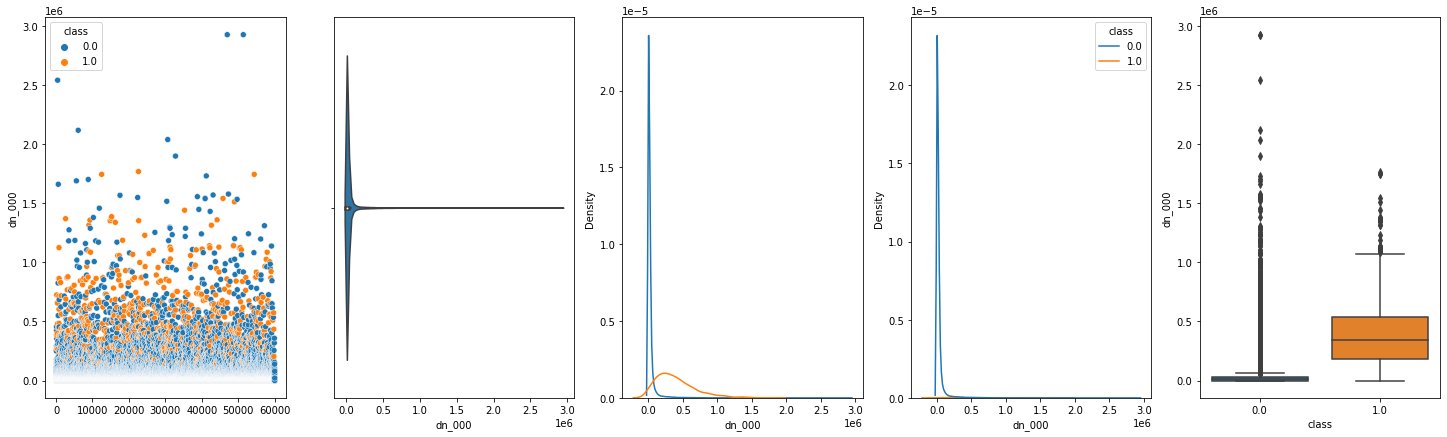

In [ ]:
unianalysis(col_list[17])

## **ee_005**


*   Higher value of the feature indicates failure.
*   Most of the feature values indicate power failure failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

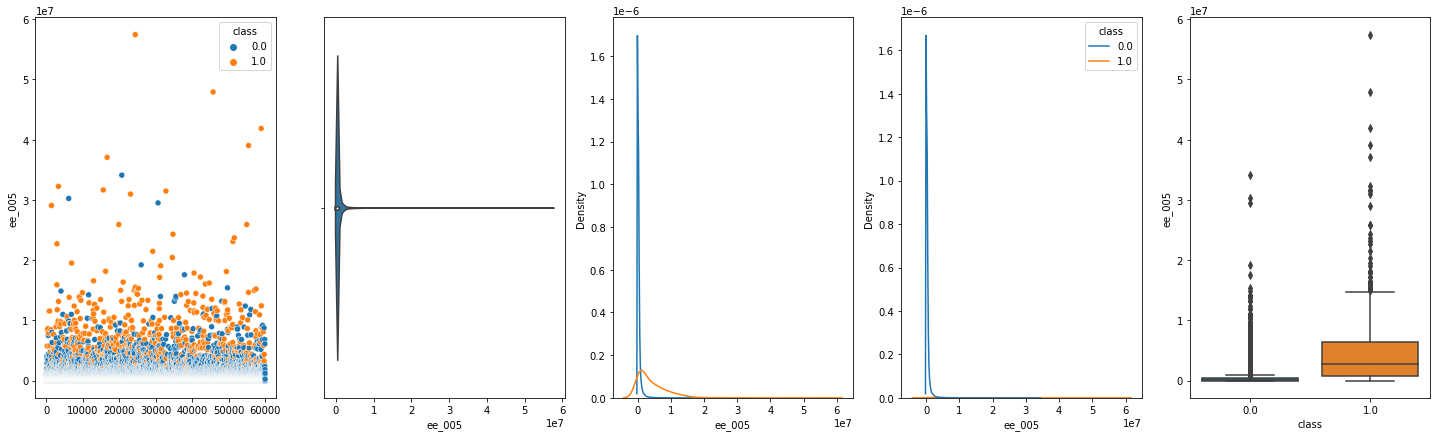

In [ ]:
unianalysis(col_list[18])

## **ee_007**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

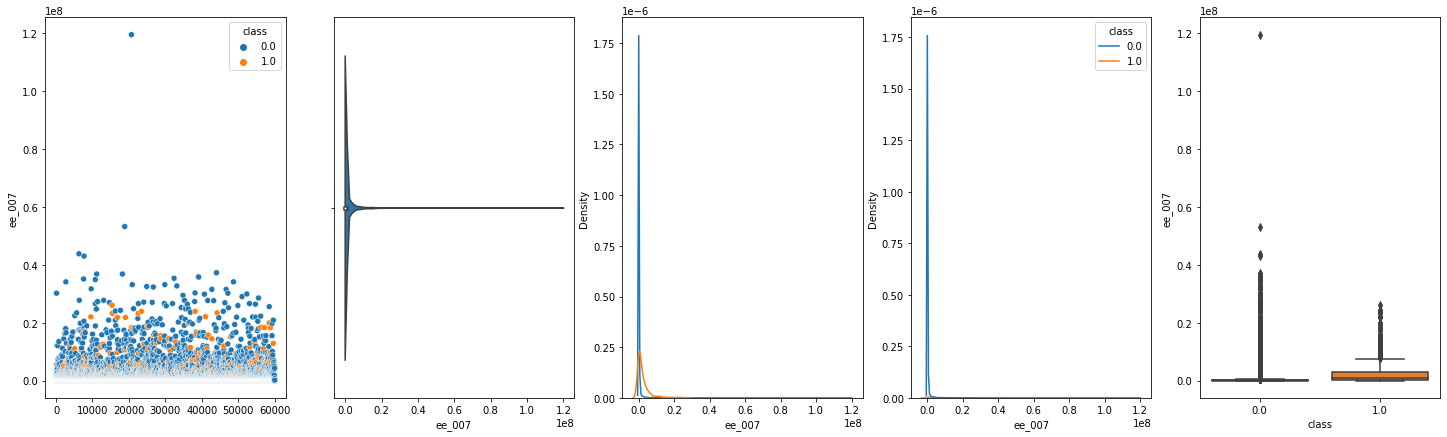

In [ ]:
unianalysis(col_list[19])

# **6. Bivariate Analysis on Features**



*   Cn_000 is the feature with consists of majority values having Aps failure. So we plot scatterplot with other features.






In [ ]:
data.columns

Index(['aa_000', 'ag_001', 'ag_002', 'ag_003', 'al_000', 'am_0', 'aq_000',
       'ay_005', 'ay_006', 'bb_000', 'bj_000', 'bt_000', 'bu_000', 'ci_000',
       'ck_000', 'cn_000', 'cn_001', 'dn_000', 'ee_005', 'ee_007', 'class'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


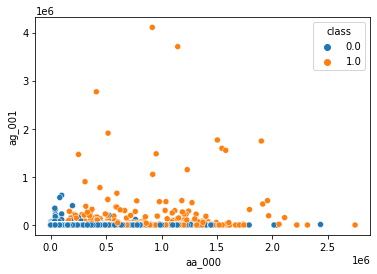

In [ ]:
sns.scatterplot(data["aa_000"],data["ag_001"],hue=data["class"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


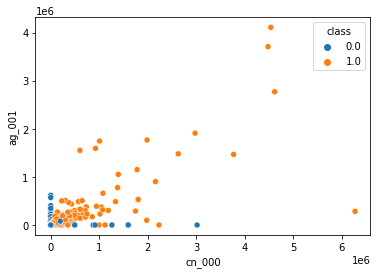

In [ ]:
sns.scatterplot(data["cn_000"],data["ag_001"],hue=data["class"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


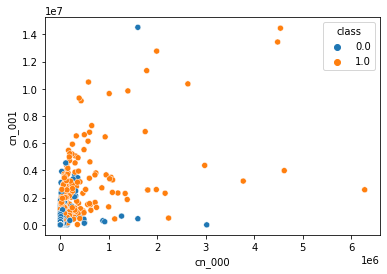

In [ ]:
sns.scatterplot(data["cn_000"],data["cn_001"],hue=data["class"])

### **Observations by EDA**


*   Most of the features have large number of values corresponding to no power failure except for feature cn_000
*   Most of the features have values with no failure are very small even close to 0.
*   Scatter plot does not reveal much information due to the fact that points with no APS failure is close to zero.




# **7. Feature Engineering**

### **7.1 PCA features**

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(data)
best_features = pca.transform(data)

In [19]:
pca1=[]
pca2=[]
pca3=[]
pca4=[]

for i in range (len(best_features)):
  pca1.append(best_features[i][0])
  pca2.append(best_features[i][1])
  pca3.append(best_features[i][2])
  pca4.append(best_features[i][3])
  



In [20]:
data_with_fe = pd.DataFrame(data)

In [21]:
data_with_fe["pca_feat1"]= pd.DataFrame(pca1)
data_with_fe["pca_feat2"]= pd.DataFrame(pca2)
data_with_fe["pca_feat3"]= pd.DataFrame(pca3)
data_with_fe["pca_feat4"]= pd.DataFrame(pca4)



### **7.2 SMOTE to oversample the dataset**

In [22]:
X = data_with_fe.drop(["class"],axis = 1)
Y = data_with_fe["class"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
# transform the dataset
oversample = over_sampling.SMOTE(ratio= 1.0)
X_train, y_train = oversample.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### **7.3 Standardizing the data**

In [25]:
from sklearn.preprocessing import StandardScaler
#Standardizing the data
std = StandardScaler()
train_data = std.fit_transform(X_train)
test_data= std.transform(X_test)

### **Summary**



*   We derive 4 Pca features. After performing PCA, we needed to balance the data.So we applied SMOTE on the dataset. And the end we standardized the data.






# **8. Applying ML models**

In [39]:
#plot confusion matrix along with False negatives and False Positives

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(x,y):
  cm = confusion_matrix(x,y)  
  sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
  print("*"*100)
  print("False Positive: ", cm[0][1])
  print("False Negative:", cm[1][0])
  print("*"*100)
  print("Total cost: ", cm[0][1] * 10 + cm[1][0] * 500)
  print("*"*100)
  



### **Logistic Regression**

In [ ]:
# Defining the LR model and performing the hyper parameter tuning using gridsearch
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets,linear_model
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{"C":[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}]

clf = LogisticRegression(max_iter=300,penalty= 'l2')

model = GridSearchCV(clf,tuned_parameters,scoring = 'f1', cv= 5)
model.fit(train_data,y_train)

print(model.best_estimator_)
print(model.score(test_data, y_test))

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.4954128440366973


In [ ]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(n_jobs= -1,random_state=42,C= 10,penalty= 'l2')
clf.fit(train_data,y_train)
y_pred = clf.predict(test_data)


#### **Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     11788
         1.0       0.35      0.90      0.51       212

    accuracy                           0.97     12000
   macro avg       0.68      0.93      0.75     12000
weighted avg       0.99      0.97      0.98     12000



****************************************************************************************************
False Positive:  346
False Negative: 22
****************************************************************************************************
Total cost:  14460
****************************************************************************************************


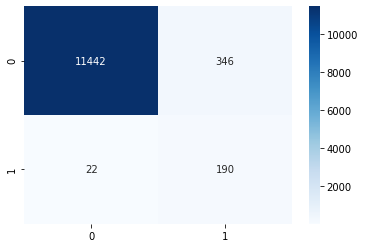

In [ ]:
plot_confusion_matrix(y_test, y_pred)


#### **Results**
*   We have a f1 macro avg score of 0.75. Precision is 0.35 so we try and increase the precision by applying differnt models. The total cost here is 14460




## **Random Forrest**

In [46]:
# model fitting and hyperparamter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()


tuned_parameters={'n_estimators':[300,500,800,1000,1200],'max_depth':[10,15,30,70,100]}

model=GridSearchCV(clf,param_grid=tuned_parameters,n_jobs=-1,scoring='f1',cv=5)
model.fit(train_data,y_train)
print("Best estimator is", model.best_params_)

Best estimator is {'max_depth': 15, 'n_estimators': 300}


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_jobs= -1,random_state=42, max_depth=15 ,n_estimators= 300)
clf.fit(train_data,y_train)
y_pred = clf.predict(test_data)


### **Classification Report**

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     11788
         1.0       0.54      0.83      0.66       212

    accuracy                           0.98     12000
   macro avg       0.77      0.91      0.83     12000
weighted avg       0.99      0.98      0.99     12000



****************************************************************************************************
False Positive:  148
False Negative: 35
****************************************************************************************************
Total cost:  18980
****************************************************************************************************


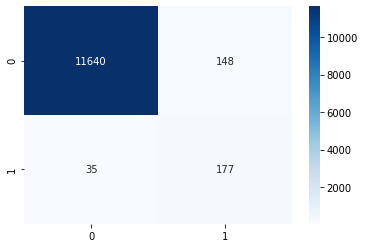

In [47]:
plot_confusion_matrix(y_test, y_pred)


### **Results**
*   We have a f1 macro avg score of 0.82. Precision is 0.54 with a f1 score of 0.66 for positive label. The total cost here is 18980. The goal here is to keep FP and FN as low as possible with a good f1 score


## **Decision Trees**

In [ ]:


# model fitting and hyperparamter tunning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf=DecisionTreeClassifier()


tuned_parameters={'max_depth':[5,10,15,20,25]}

model=GridSearchCV(clf,param_grid=tuned_parameters,n_jobs=-1,scoring='f1',cv=5)
model.fit(train_data,y_train)
print("Best estimator is", model.best_params_)

Best estimator is {'max_depth': 25}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=42,max_depth=25)
clf.fit(train_data,y_train)
y_pred = clf.predict(test_data)

### **Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     11788
         1.0       0.49      0.79      0.61       212

    accuracy                           0.98     12000
   macro avg       0.74      0.89      0.80     12000
weighted avg       0.99      0.98      0.98     12000



****************************************************************************************************
False Positive:  174
False Negative: 44
****************************************************************************************************
Total cost:  23740
****************************************************************************************************


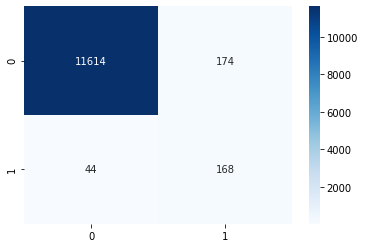

In [ ]:
plot_confusion_matrix(y_test, y_pred)


### **Results**
*   We have a f1 macro avg score of 0.80 .Precision is 0.49 with a f1 score of 0.61  The total cost here is 23740


## **XGBOOST**

In [ ]:
# model fitting and hyperparamter tunning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
clf=XGBClassifier()


tuned_parameters={'n_estimators':[200,300,500,800],'max_depth':[3,5,10]}

model=GridSearchCV(clf,param_grid=tuned_parameters,n_jobs=-1,scoring='f1',cv=5)
model.fit(train_data,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [200, 300, 500, 800]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [ ]:
print("Best estimator is", model.best_params_)

Best estimator is {'max_depth': 10, 'n_estimators': 200}


In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics

clf = XGBClassifier(n_jobs= -1,random_state=42,max_depth=10,n_estimators= 200)
clf.fit(train_data,y_train)
y_pred = clf.predict(test_data)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     11788
         1.0       0.57      0.82      0.67       212

    accuracy                           0.99     12000
   macro avg       0.78      0.90      0.83     12000
weighted avg       0.99      0.99      0.99     12000



****************************************************************************************************
False Positive:  129
False Negative: 39
****************************************************************************************************
Total cost:  20790
****************************************************************************************************


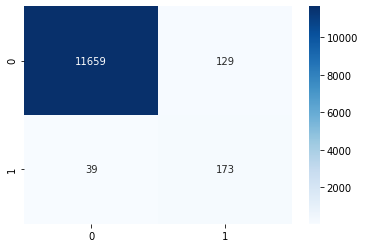

In [ ]:
plot_confusion_matrix(y_test, y_pred)


### **Results**
*   We have a f1 macro avg score of 0.83 .Precision is 0.57 with a f1 score of 0.67.  The total cost here is 20790

### **Conclusion**


*   XGBOOST has a f1 score of 0.67 for positive label compared to 0.64 to that of random forrest. XGBOOST has a similar macro f1 score to random forrest. But Random forrest has a lower total cost of 19970. 
*   Logistic Regression has the lowest cost of 14460 but have a relatively poor f1 score of 0.51.
*   So Random Forrest is the model which performs best compared to all the models. 



## **ADABOOST**

In [ ]:
# model fitting and hyperparamter tunning
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
clf=AdaBoostClassifier()


tuned_parameters={'n_estimators':[100,200,300,500]}

model=GridSearchCV(clf,param_grid=tuned_parameters,n_jobs=-1,scoring='f1',cv=5)
model.fit(train_data,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
print("Best estimator is", model.best_params_)

Best estimator is {'n_estimators': 500}


In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics

clf = AdaBoostClassifier(random_state=42,n_estimators= 500)
clf.fit(train_data,y_train)
y_pred = clf.predict(test_data)

#### **Results**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     11788
         1.0       0.33      0.86      0.48       212

    accuracy                           0.97     12000
   macro avg       0.66      0.92      0.73     12000
weighted avg       0.99      0.97      0.97     12000



****************************************************************************************************
False Positive:  371
False Negative: 29
****************************************************************************************************
Total cost:  18210
****************************************************************************************************


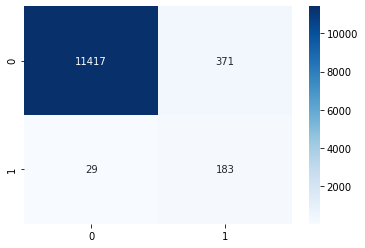

In [ ]:
plot_confusion_matrix(y_test, y_pred)

## **Custom Classifier**

In [ ]:
X = data_with_fe.drop(["class"],axis = 1).values

Y = np.array(data_with_fe["class"])



  




In [ ]:
# This function creates k samples from D1 and create k models from these samples
def create_samples(k):
  model_list=[]
  for i in range (k):
    xx_train,xx_test,yy_train,yy_test = train_test_split(D1,D1_y,test_size=0.2)
  
    model = base_model(xx_train,yy_train)
    model_list.append(model)
  
  return model_list

In [ ]:
# This functions returns predictions after a dataset is passed to the k base models
def create_pred(D2,model_list):
  predictions = []
  for i in range(len(D2)):
    pred = []
    for k in range(len(model_list)):
      y_prediction = model_list[k].predict(D2[i].reshape(1, -1))[0]
      pred.append(y_prediction)
    predictions.append(pred)

  return predictions



In [ ]:
# This function returns a data frame
 def create_meta_data(x,y):
  meta_dataset = pd.DataFrame(x)
  meta_dataset["Target"]= y
  return meta_dataset

In [ ]:
#split the data into x_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y,test_size=0.20)

#split x_train into D1 D2 in 50:50
D1,D2,D1_y,D2_y = train_test_split(X_train,y_train,test_size=0.50)

In [ ]:
#This functions returns the final prediction

def custom_classifier(k):
    

  model_list = create_samples(k) #returns a list of k base models

  predictions = create_pred(D2,model_list) # Returns a list after D2 is passed to the  k base models

  meta_dataset = create_meta_data(predictions,D2_y)# Using the predictions we create a meta dataset with D2 target variables

  meta_dataset_train= meta_dataset.drop(["Target"],axis = 1) #splits the meta dataset 
  meta_dataset_test= meta_dataset["Target"]

  # Classifier is trained on meta datset with k predictions to create a meta model
  meta_model1 = RandomForestClassifier(n_estimators=100, max_depth=15).fit(meta_dataset_train,meta_dataset_test)

  predictions_x_test = create_pred(X_test,model_list) #returns a predictions list with 20% of the original test data passed through the base models

  final_dataset = create_meta_data(predictions_X_test,y_test) #final dataset with the new predictions

  final_dataset_test = pd.DataFrame(predictions_x_test)
  #final_dataset_test["Target"]= y_test
  
  meta_pred = meta_model1.predict(final_dataset_test)# the final predictions is passed through the metamodel

  return meta_pred
 


### **Hyperparameter tuning of k**

In [ ]:
# Specify Parameters
from sklearn.metrics import f1_score
params = [10,20,30,50,70,100,150,200]

scores={}
# for each "number of base models"
for n in params:
    # Predict class label of test data for each parameter
    y_hat = custom_classifier(n)  
    scores[str(n)] = f1_score( y_test , y_hat)
    
best_k = max(scores, key=scores.get) 
print(best_k)

50


### **Results**

Results for k =50

In [ ]:
y_hat = custom_classifier(50)

****************************************************************************************************
False Positive:  77
False Negative: 19
****************************************************************************************************
Total cost:  10270
****************************************************************************************************


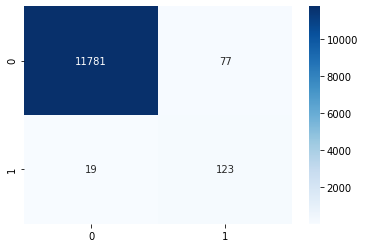

In [ ]:
plot_confusion_matrix(y_hat,y_test)

In [ ]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     11858
         1.0       0.61      0.87      0.72       142

    accuracy                           0.99     12000
   macro avg       0.81      0.93      0.86     12000
weighted avg       0.99      0.99      0.99     12000



# **9. Deep Neurat Network**

In [33]:
len(X_train[0])

24

In [232]:
#Building a Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units = 20, activation = 'relu', input_dim =X_train.shape[1] ))
model.add(Dense(units = 50, activation = 'relu'))
#model.add(Dense(units = 50, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [233]:

model.fit(train_data, y_train, batch_size = 10, epochs = 10)


Epoch 1/10
9443/9443 [==============================] - 13s 1ms/step - loss: 0.1625 - accuracy: 0.9452
Epoch 2/10
9443/9443 [==============================] - 13s 1ms/step - loss: 0.1150 - accuracy: 0.9646
Epoch 3/10
9443/9443 [==============================] - 13s 1ms/step - loss: 0.1056 - accuracy: 0.9681
Epoch 4/10
9443/9443 [==============================] - 13s 1ms/step - loss: 0.1017 - accuracy: 0.9698
Epoch 5/10
9443/9443 [==============================] - 13s 1ms/step - loss: 0.0944 - accuracy: 0.9730
Epoch 6/10
9443/9443 [==============================] - 13s 1ms/step - loss: 0.0912 - accuracy: 0.9735
Epoch 7/10
9443/9443 [==============================] - 13s 1ms/step - loss: 0.0884 - accuracy: 0.9749
Epoch 8/10
9443/9443 [==============================] - 13s 1ms/step - loss: 0.0844 - accuracy: 0.9757
Epoch 9/10
9443/9443 [==============================] - 13s 1ms/step - loss: 0.0858 - accuracy: 0.9750
Epoch 10/10
9443/9443 [==============================] - 13s 1ms/step - l

In [234]:
y_pred = model.predict_classes(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## **Results**

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     11788
         1.0       0.47      0.83      0.60       212

    accuracy                           0.98     12000
   macro avg       0.73      0.91      0.80     12000
weighted avg       0.99      0.98      0.98     12000



****************************************************************************************************
False Positive:  35
False Negative: 200
****************************************************************************************************
Total cost:  100350
****************************************************************************************************


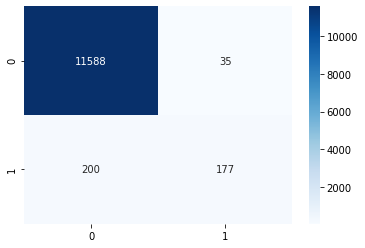

In [197]:
plot_confusion_matrix(y_pred,y_test)

## **Conclusion**



*   It has a better f1 score of 0.60 for positive class than logistic regression and adaboost but poor cost function.




# **10. Summary**

In [237]:
from prettytable import PrettyTable
table=PrettyTable()

table.field_names = ['Model','F1 Score','Cost']

table.add_row(['Logistic Regression',"0.51","14460"])


table.add_row(['Decision Trees',"0.61","23740"])
table.add_row(['Random Forest',"0.66","18890"])
table.add_row(['XGBOOST',"0.67","20790"])
table.add_row(['Adaptive Boosting',"0.50","18210"])
table.add_row(['Custom Classifier',"0.72","10270"])
table.add_row(['Neural netwok',"0.60","100350"])

print(table)

+---------------------+----------+--------+
|        Model        | F1 Score |  Cost  |
+---------------------+----------+--------+
| Logistic Regression |   0.51   | 14460  |
|    Decision Trees   |   0.61   | 23740  |
|    Random Forest    |   0.66   | 18890  |
|       XGBOOST       |   0.67   | 20790  |
|  Adaptive Boosting  |   0.50   | 18210  |
|  Custom Classifier  |   0.72   | 10270  |
|    Neural netwok    |   0.60   | 100350 |
+---------------------+----------+--------+





*   Custom Classifier with 50 base models gives us the highest f1 score of 0.72 and lowest cost of 10270




